# COVID-19 Data Analysis and Visualization in context to Indian data
This is done as a part of J-component of CSE-3020 DATA VISUALIZATION COURSE.This notebook uses data analysis and visualization to analyze the effects of the ongoing COVID-19 pandemic in India, and create visualizations for important observations made during the analysis.

## Importing libraries

In [1]:
# import libraries for data analysis & visualization
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from urllib.request import urlopen
import folium as flm
from folium import plugins
import ipywidgets
import geocoder
import geopy
import json
import requests
import re
import math
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style = 'whitegrid', rc = {'xtick.bottom': True, 'ytick.left': True})

In [2]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [3]:
confirmed_color = 'navy'
recovered_color = 'green'
death_color = 'indianred'
active_color = 'purple'

## Dataset source website
 https://api.covid19india.org/

In [4]:
df1 = "https://api.covid19india.org/state_district_wise.json"
df2 = "https://api.covid19india.org/data.json"

In [5]:
def getting_data(url):
    response = requests.get(url)
    data = response.content.decode('utf-8')
    return data

In [6]:
df_state = json.loads(getting_data(df1))
df = json.loads(getting_data(df2))

In [7]:
lis = []
state_names = df_state.keys()
for state in state_names:
    district_names = df_state[state]['districtData'].keys() #Districts of Current State
    for district in district_names:
        temp = df_state[state]['districtData'][district]
        var_lis = [state,district,temp.get('confirmed'),temp.get('recovered'),
                   temp.get('active'),temp.get('deceased')]
        lis.append(var_lis)
    district_wise = pd.DataFrame(lis,columns=['State/UT','District','Confirmed',
                                              'Recovered','Active','Death'])
district_wise.head()

,State/UT,District,Confirmed,Recovered,Active,Death
0,State Unassigned,Unassigned,0,0,0,0
1,Andaman and Nicobar Islands,Nicobars,0,0,0,0
2,Andaman and Nicobar Islands,North and Middle Andaman,1,1,0,0
3,Andaman and Nicobar Islands,South Andaman,51,32,19,0
4,Andaman and Nicobar Islands,Unknown,6826,6511,209,106


In [8]:
temp = [[i['state'],i['confirmed'],i['recovered'],i['active'],i['deaths'],
         i['lastupdatedtime']] for i in df['statewise']]
statewise_total = pd.DataFrame(temp,columns=['State/UT','Confirmed','Recovered',
                                          'Active','Death','LastUpdateTime'])
statewise_total.head()

,State/UT,Confirmed,Recovered,Active,Death,LastUpdateTime
0,Total,27168950,24344443,2502261,311460,26/5/2021 13:33:01
1,Andaman and Nicobar Islands,6878,6544,228,106,25/05/2021 22:02:11
2,Andhra Pradesh,1609105,1400754,198023,10328,25/05/2021 19:54:10
3,Arunachal Pradesh,25002,21575,3323,104,26/05/2021 00:17:06
4,Assam,381171,323368,53541,2915,25/05/2021 22:02:19


In [9]:
statewise_total['Confirmed']=statewise_total['Confirmed'].astype('int')
statewise_total['Recovered']=statewise_total['Recovered'].astype('int')
statewise_total['Active']=statewise_total['Active'].astype('int')
statewise_total['Death']=statewise_total['Death'].astype('int')
statewise_total['RecoveryRate%'] = round(statewise_total['Recovered']/statewise_total['Confirmed']*100,2)
statewise_total['MortalityRate%'] = round(statewise_total['Death']/statewise_total['Confirmed']*100,2)
statewise_total['Active/100 Confirmed'] = round(statewise_total['Active']/statewise_total['Confirmed']*100,2)
for i,y in enumerate(statewise_total['LastUpdateTime']):
    statewise_total['LastUpdateTime'][i] = pd.to_datetime(y.split(' ')[0])
statewise_total['LastUpdateTime'] = pd.to_datetime(statewise_total['LastUpdateTime'])
statewise_total.head()

,State/UT,Confirmed,Recovered,Active,Death,LastUpdateTime,RecoveryRate%,MortalityRate%,Active/100 Confirmed
0,Total,27168950,24344443,2502261,311460,2021-05-26,89.60,1.15,9.21
1,Andaman and Nicobar Islands,6878,6544,228,106,2021-05-25,95.14,1.54,3.31
2,Andhra Pradesh,1609105,1400754,198023,10328,2021-05-25,87.05,0.64,12.31
3,Arunachal Pradesh,25002,21575,3323,104,2021-05-26,86.29,0.42,13.29
4,Assam,381171,323368,53541,2915,2021-05-25,84.84,0.76,14.05


In [10]:
timeseries = [list(i.values()) for i in df['cases_time_series']]
timeseries = pd.DataFrame(timeseries,columns=df['cases_time_series'][0].keys())
timeseries.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,dateymd,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January 2020,2020-01-30,1,0,0
1,0,0,0,31 January 2020,2020-01-31,1,0,0
2,0,0,0,1 February 2020,2020-02-01,1,0,0
3,1,0,0,2 February 2020,2020-02-02,2,0,0
4,1,0,0,3 February 2020,2020-02-03,3,0,0


In [11]:
timeseries['dailyconfirmed'] = timeseries['dailyconfirmed'].astype('int')
timeseries['dailydeceased'] = timeseries['dailydeceased'].astype('int')
timeseries['dailyrecovered'] = timeseries['dailyrecovered'].astype('int')
timeseries['totalconfirmed'] = timeseries['totalconfirmed'].astype('int')
timeseries['totaldeceased'] = timeseries['totaldeceased'].astype('int')
timeseries['totalrecovered'] = timeseries['totalrecovered'].astype('int')
timeseries['7dyMnConfirmed'] = timeseries.totalconfirmed.rolling(7).mean().fillna(0).astype(int)
timeseries['7dyMnRecovered'] = timeseries.totalrecovered.rolling(7).mean().fillna(0).astype(int)
timeseries['7dyMnDeceased'] = timeseries.totaldeceased.rolling(7).mean().fillna(0).astype(int)
timeseries.head(10)

,dailyconfirmed,dailydeceased,dailyrecovered,date,dateymd,totalconfirmed,totaldeceased,totalrecovered,7dyMnConfirmed,7dyMnRecovered,7dyMnDeceased
0,1,0,0,30 January 2020,2020-01-30,1,0,0,0,0,0
1,0,0,0,31 January 2020,2020-01-31,1,0,0,0,0,0
2,0,0,0,1 February 2020,2020-02-01,1,0,0,0,0,0
3,1,0,0,2 February 2020,2020-02-02,2,0,0,0,0,0
4,1,0,0,3 February 2020,2020-02-03,3,0,0,0,0,0
5,0,0,0,4 February 2020,2020-02-04,3,0,0,0,0,0
6,0,0,0,5 February 2020,2020-02-05,3,0,0,2,0,0
7,0,0,0,6 February 2020,2020-02-06,3,0,0,2,0,0
8,0,0,0,7 February 2020,2020-02-07,3,0,0,2,0,0
9,0,0,0,8 February 2020,2020-02-08,3,0,0,2,0,0


## 1)Total cases in India

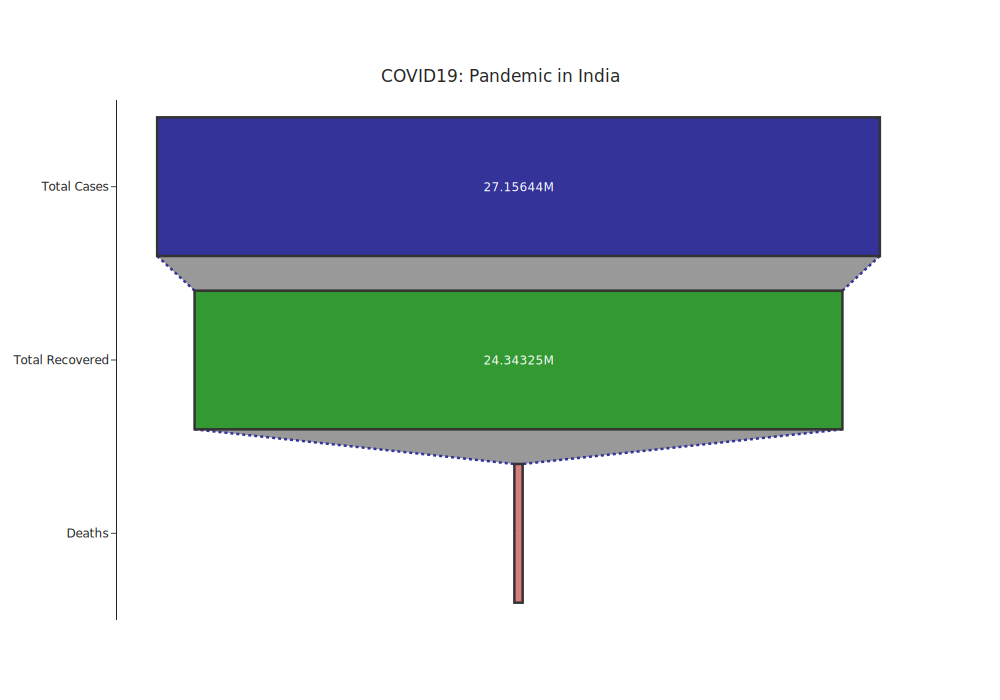

In [12]:
fig = go.Figure(go.Funnel(
    x = [timeseries['totalconfirmed'].iloc[-1],timeseries['totalrecovered'].iloc[-1],
         timeseries['totaldeceased'].iloc[-1]],
    y = ["Total Cases", "Total Recovered",  "Deaths"],
    textposition = "inside",
    textinfo = "value",
    opacity = 0.8, 
    marker = {"color": [confirmed_color,recovered_color,death_color],
              "line": {"width": 2.5, "color": 'Black'}},
    connector = {"line": {"color": "navy", "dash": "dot", "width": 2.5}}))
fig.update_layout(
    template="simple_white",
    title={'text': "COVID19: Pandemic in India",'x':0.5,'y':0.9,       
        'xanchor': 'center','yanchor': 'top'})
fig.update_layout(height=700)
fig.show('svg',height = 700, width = 1000) #static image

## 2)Statewise cases in India

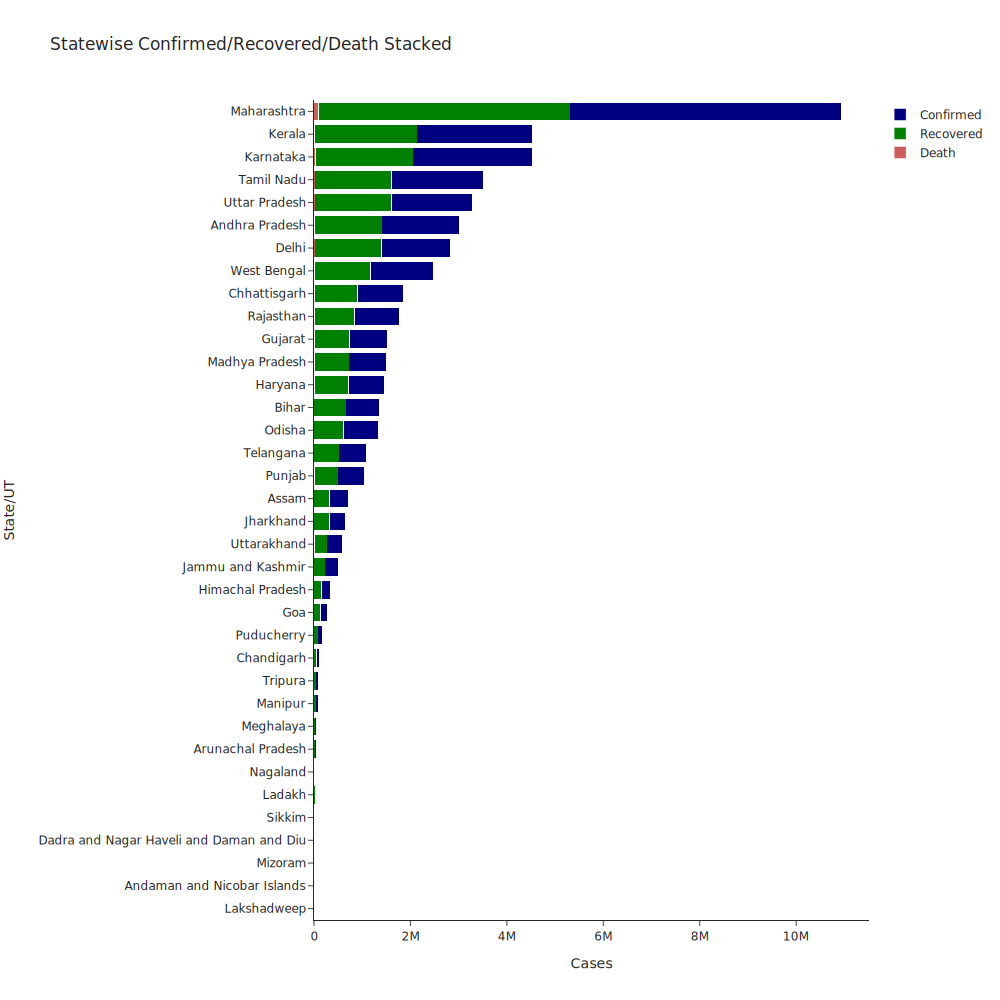

In [13]:
temp = statewise_total[statewise_total['State/UT']!='Total']
temp = temp[temp['State/UT']!='State Unassigned']
fig = go.Figure(data=[
    go.Bar(name='Death', y=temp['State/UT'], x=temp['Death'],orientation='h',marker_color=death_color),
    go.Bar(name='Recovered', y=temp['State/UT'], x=temp['Recovered'],orientation='h',marker_color=recovered_color),
    go.Bar(name='Confirmed', y=temp['State/UT'], x=temp['Confirmed'],orientation='h',marker_color=confirmed_color)
])
fig.update_layout(barmode='stack',title='Statewise Confirmed/Recovered/Death Stacked', xaxis_title="Cases", yaxis_title="State/UT", 
                      yaxis_categoryorder = 'total ascending', height = 1000,
                      template='simple_white')
fig.show('svg',height = 1000, width = 1000) #static image

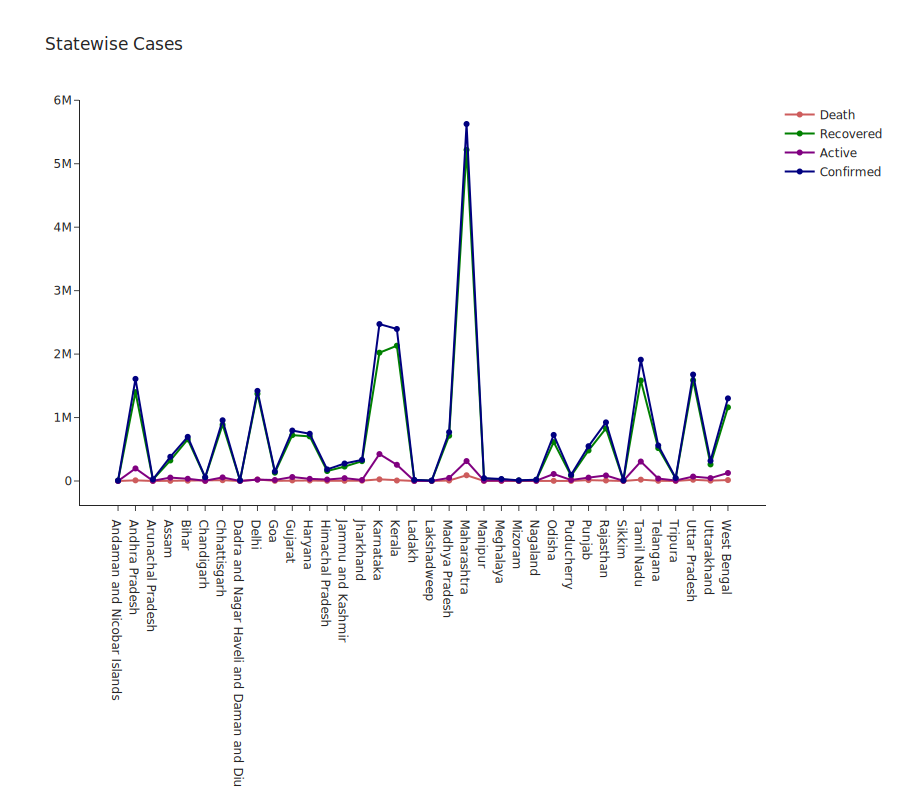

In [14]:
temp = statewise_total[statewise_total['State/UT']!='Total']
temp = temp[temp['State/UT']!='State Unassigned']
fig = go.Figure()
fig.add_trace(go.Scatter(y=temp['Death'], x=temp['State/UT'],
                    mode='lines+markers',
                    name='Death',marker_color=death_color))
fig.add_trace(go.Scatter(y=temp['Recovered'], x=temp['State/UT'],
                    mode='lines+markers',
                    name='Recovered',marker_color=recovered_color))
fig.add_trace(go.Scatter(y=temp['Active'], x=temp['State/UT'],
                    mode='lines+markers', name='Active',marker_color=active_color))
fig.add_trace(go.Scatter(y=temp['Confirmed'], x=temp['State/UT'],
                    mode='lines+markers', name='Confirmed',marker_color=confirmed_color))
fig.update_layout(height=900,width= 1200, title_text="Statewise Cases",template='simple_white')
fig.show('svg',height = 800, width = 900) #static image

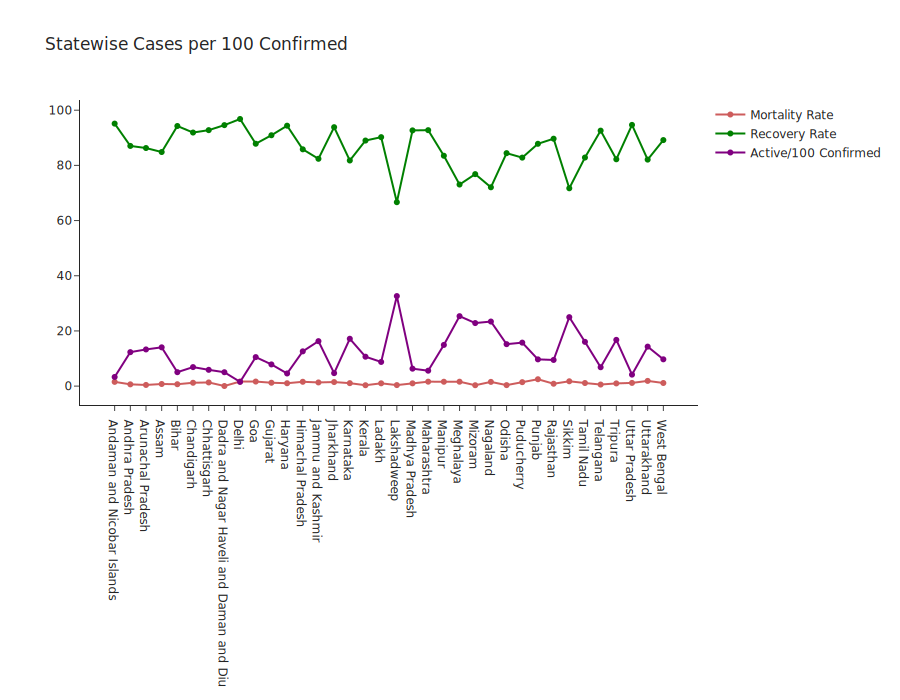

In [15]:
temp = statewise_total[statewise_total['State/UT']!='Total']
temp = temp[temp['State/UT']!='State Unassigned']
fig = go.Figure()
fig.add_trace(go.Scatter(y=temp['MortalityRate%'], x=temp['State/UT'],
                    mode='lines+markers',
                    name='Mortality Rate',marker_color=death_color))
fig.add_trace(go.Scatter(y=temp['RecoveryRate%'], x=temp['State/UT'],
                    mode='lines+markers',
                    name='Recovery Rate',marker_color=recovered_color))
fig.add_trace(go.Scatter(y=temp['Active/100 Confirmed'], x=temp['State/UT'],
                    mode='lines+markers', name='Active/100 Confirmed',marker_color=active_color))
fig.update_layout(height=700,width= 1200, title_text="Statewise Cases per 100 Confirmed",template='simple_white')
fig.show('svg',height = 700, width = 900) #static image

## 3)Total cases in India Analysis with 7-day Average

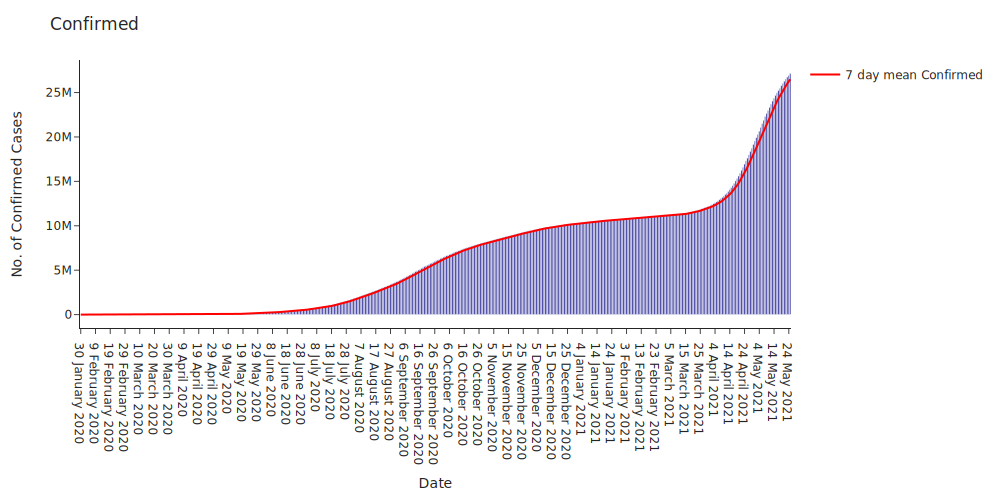

In [16]:
fig = px.bar(timeseries, x='date', y='totalconfirmed', color_discrete_sequence=[confirmed_color],template='simple_white')
fig.update_layout(title='Confirmed', xaxis_title="Date", yaxis_title="No. of Confirmed Cases")
fig.add_scatter(x=timeseries['date'],y=timeseries['7dyMnConfirmed'],name='7 day mean Confirmed',
                marker={'color': 'red','opacity': 0.6,'colorscale': 'Viridis'},)
fig.show('svg',height = 500, width = 1000) #static image

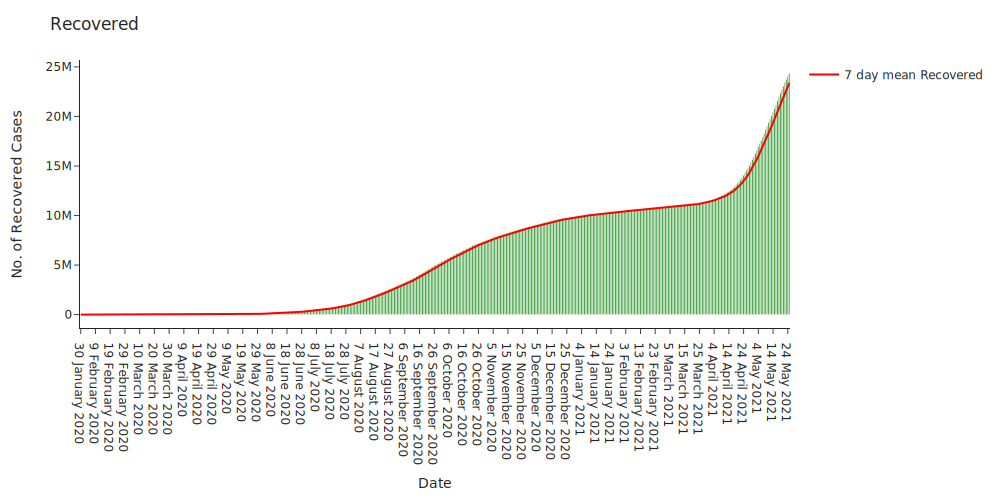

In [17]:
fig = px.bar(timeseries, x='date', y='totalrecovered', 
             color_discrete_sequence=[recovered_color],template='simple_white')
fig.update_layout(title='Recovered', xaxis_title="Date", yaxis_title="No. of Recovered Cases")
fig.add_scatter(x=timeseries['date'],y=timeseries['7dyMnRecovered'],name='7 day mean Recovered',
                marker={'color': 'red','opacity': 0.6,'colorscale': 'Viridis'},)
fig.show('svg',height = 500, width = 1000) #static image


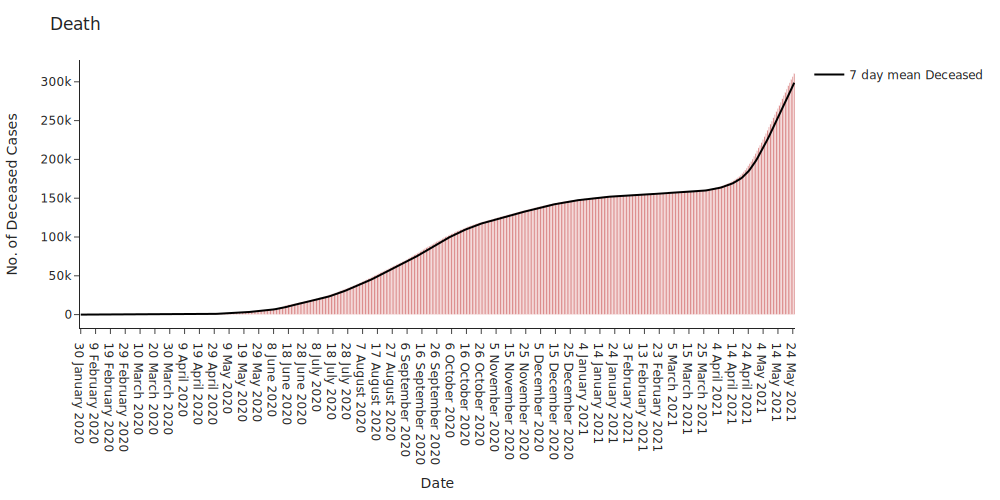

In [18]:
fig = px.bar(timeseries, x='date', y='totaldeceased', 
             color_discrete_sequence=[death_color],template='simple_white')
fig.update_layout(title='Death', xaxis_title="Date", yaxis_title="No. of Deceased Cases")
fig.add_scatter(x=timeseries['date'],y=timeseries['7dyMnDeceased'],name='7 day mean Deceased',
                marker={'color': 'black','opacity': 0.6,'colorscale': 'Viridis'},)
fig.show('svg',height = 500, width = 1000) #static image

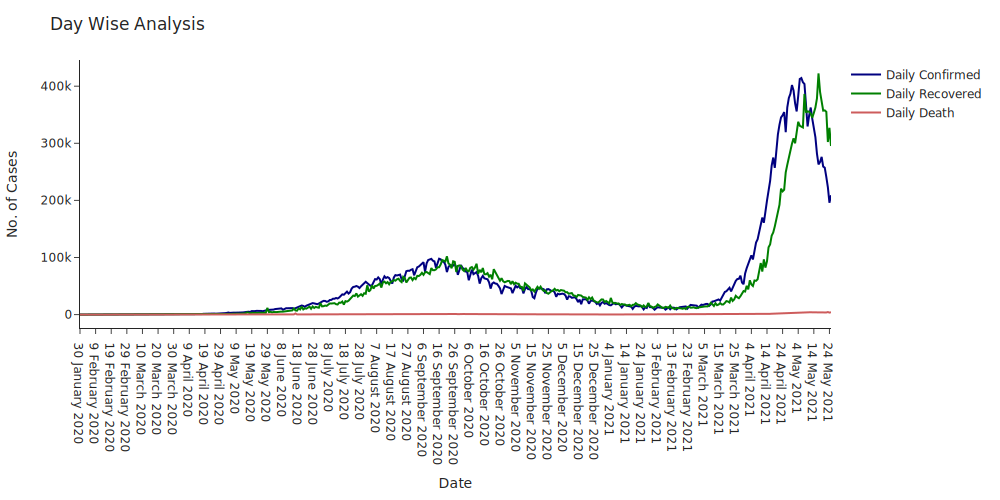

In [19]:
fig = px.line(color_discrete_sequence=[confirmed_color],template='simple_white')
fig.add_scatter(x=timeseries['date'],y=timeseries['dailyconfirmed'],name='Daily Confirmed',marker={'color': confirmed_color,'opacity': 0.6,'colorscale': 'Viridis'},)
fig.add_scatter(x=timeseries['date'],y=timeseries['dailyrecovered'],name='Daily Recovered',marker={'color': recovered_color,'opacity': 0.6,'colorscale': 'Viridis'},)
fig.add_scatter(x=timeseries['date'],y=timeseries['dailydeceased'],name='Daily Death',marker={'color': death_color,'opacity': 0.6,'colorscale': 'Viridis'})
fig.update_layout(title='Day Wise Analysis', xaxis_title="Date", yaxis_title="No. of Cases")
fig.show('svg',height = 500, width = 1000) #static image

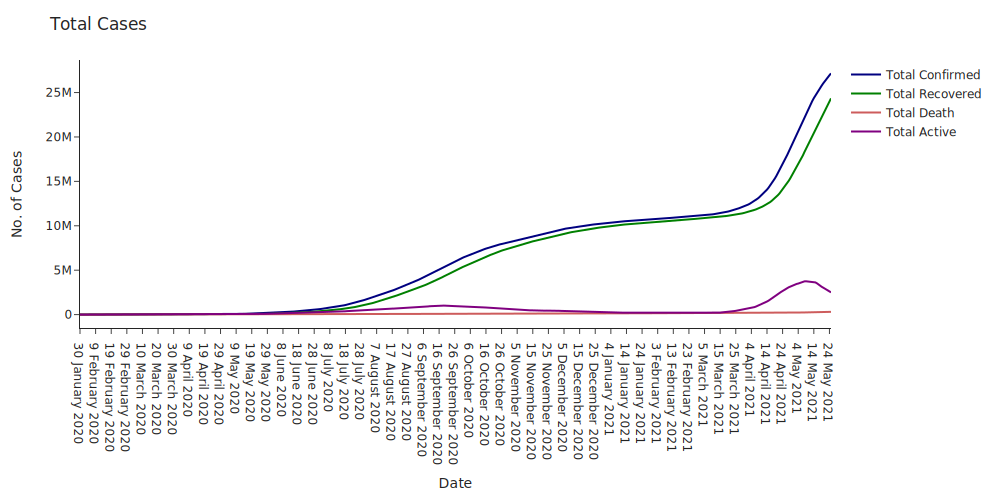

In [20]:
timeseries['totalactive'] = timeseries.totalconfirmed-timeseries.totalrecovered-timeseries.totaldeceased
fig = px.line(color_discrete_sequence=[confirmed_color],template='simple_white')
fig.add_scatter(x=timeseries['date'],y=timeseries['totalconfirmed'],name='Total Confirmed',marker={'color': confirmed_color,'opacity': 0.6,'colorscale': 'Viridis'},)
fig.add_scatter(x=timeseries['date'],y=timeseries['totalrecovered'],name='Total Recovered',marker={'color': recovered_color,'opacity': 0.6,'colorscale': 'Viridis'},)
fig.add_scatter(x=timeseries['date'],y=timeseries['totaldeceased'],name='Total Death',marker={'color': death_color,'opacity': 0.6,'colorscale': 'Viridis'})
fig.add_scatter(x=timeseries['date'],y=timeseries['totalactive'],name='Total Active',marker={'color': active_color,'opacity': 0.6,'colorscale': 'Viridis'})
fig.update_layout(title='Total Cases', xaxis_title="Date", yaxis_title="No. of Cases")
fig.show('svg',height = 500, width = 1000) #static image


# 4)Top 10 worst-hit districts

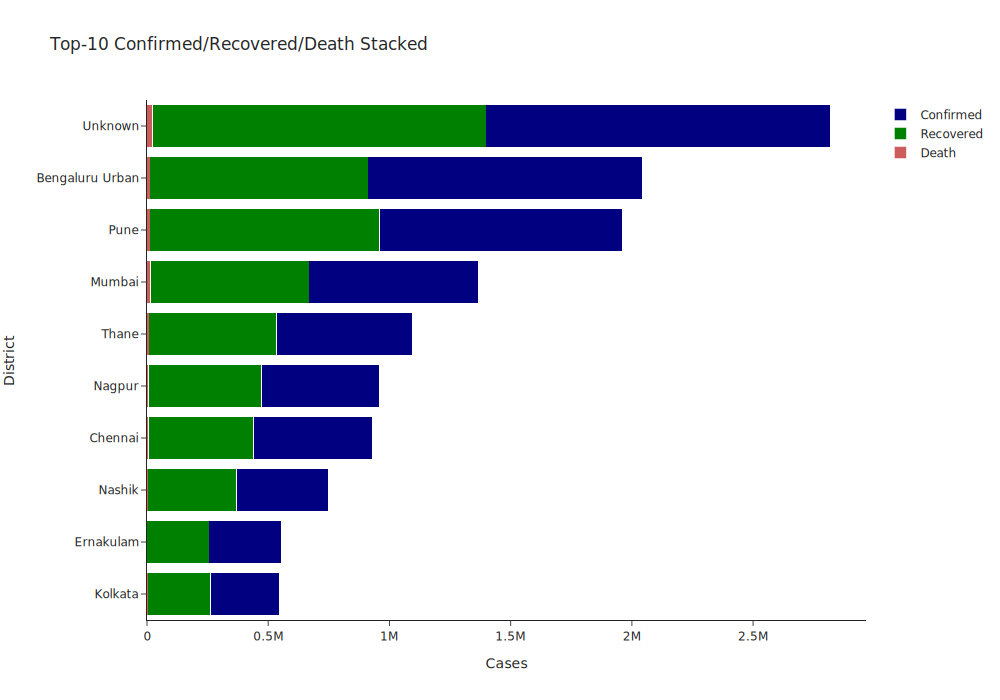

In [21]:
temp = district_wise.sort_values('Confirmed').tail(10)
fig = go.Figure(data=[
    go.Bar(name='Death', y=temp['District'], x=temp['Death'].head(10),orientation='h',marker_color=death_color),
    go.Bar(name='Recovered', y=temp['District'], x=temp['Recovered'].head(21),orientation='h',marker_color=recovered_color),
    go.Bar(name='Confirmed', y=temp['District'], x=temp['Confirmed'].head(21),orientation='h',marker_color=confirmed_color)
])
fig.update_layout(barmode='stack',title='Top-10 Confirmed/Recovered/Death Stacked', xaxis_title="Cases", yaxis_title="District", 
                      yaxis_categoryorder = 'total ascending',
                     template='simple_white')
fig.show('svg',height = 700, width = 1000) #static image
#Unknown corresponds to Delhi,the metropolitan capital of India

## 5) District Wise Conditional Formatting of worst-hit top 20 State/UT

In [22]:
district_wise = district_wise[district_wise['State/UT']!='State Unassigned']
district_wise.sort_values('Confirmed', ascending= False).head(20).fillna(0).style\
                        .background_gradient(cmap='Blues_r',subset=["Confirmed"])\
                        .background_gradient(cmap='Greens_r',subset=["Recovered"])\
                        .background_gradient(cmap='Reds_r',subset=["Death"])\
                        .background_gradient(cmap='pink_r',subset=["Active"])

,State/UT,District,Confirmed,Recovered,Active,Death
160,Delhi,Unknown,1419198,1374682,20952,23564
289,Karnataka,Bengaluru Urban,1131496,900081,219551,11863
360,Maharashtra,Pune,1003844,946389,45648,11747
350,Maharashtra,Mumbai,698988,654398,27855,14650
367,Maharashtra,Thane,558309,526542,23702,8034
617,Tamil Nadu,Chennai,487691,433592,47553,6546
352,Maharashtra,Nagpur,487306,466263,14556,6437
355,Maharashtra,Nashik,380970,363763,12793,4413
318,Kerala,Ernakulam,297283,255087,41391,757
759,West Bengal,Kolkata,284833,257653,22921,4259


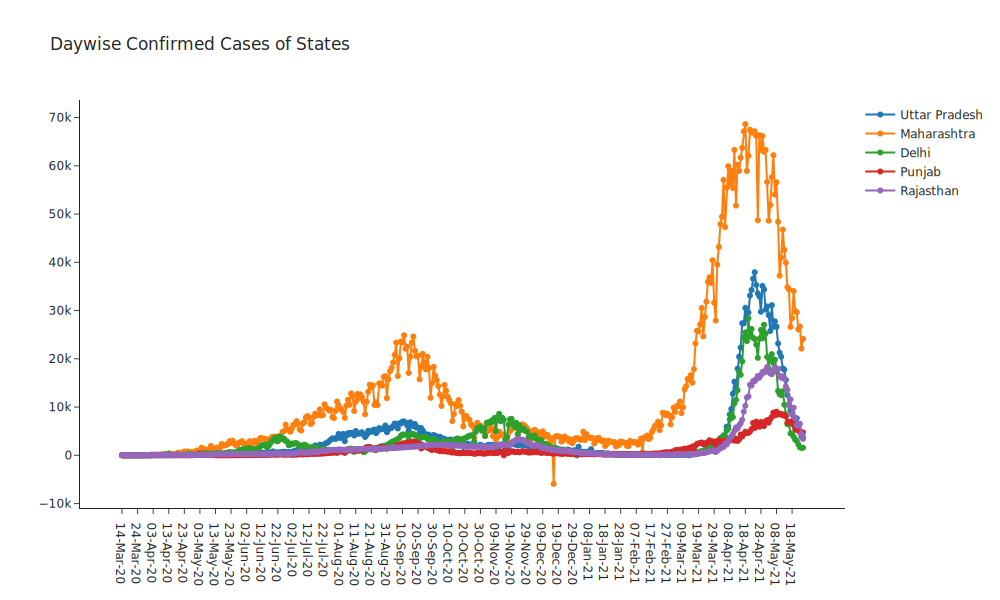

In [23]:
temp = pd.read_csv('https://api.covid19india.org/csv/latest'
                                '/state_wise_daily.csv')
temp = temp[temp['Status']=='Confirmed']
fig = go.Figure()
# fig.add_trace(go.Scatter(y=temp['TT'], x=temp['Date'],
#                     mode='lines+markers',name='Total'))
fig.add_trace(go.Scatter(y=temp['UP'], x=temp['Date'],
                    mode='lines+markers',name='Uttar Pradesh'))
fig.add_trace(go.Scatter(y=temp['MH'], x=temp['Date'],
                    mode='lines+markers',name='Maharashtra'))
fig.add_trace(go.Scatter(y=temp['DL'], x=temp['Date'],
                    mode='lines+markers',name='Delhi'))
fig.add_trace(go.Scatter(y=temp['PB'], x=temp['Date'],
                    mode='lines+markers',name='Punjab'))
fig.add_trace(go.Scatter(y=temp['RJ'], x=temp['Date'],
                    mode='lines+markers',name='Rajasthan'))
fig.update_layout(title_text="Daywise Confirmed Cases of States",
                  template='simple_white',height=700)
fig.show('svg',height = 600, width = 1000) #static image

In [24]:
temp = pd.read_csv('https://api.covid19india.org/csv/latest'
                                '/state_wise_daily.csv')
temp = temp[temp['Status']=='Confirmed']
temp['TTtotal'] = temp['TT'].cumsum()
temp['UPtotal'] = temp['UP'].cumsum()
temp['DLtotal'] = temp['DL'].cumsum()
temp['GJtotal'] = temp['GJ'].cumsum()
temp['PBtotal'] = temp['PB'].cumsum()
temp['RJtotal'] = temp['RJ'].cumsum()
temp['7dyMnUP'] = temp.UPtotal.rolling(7).mean().fillna(0).astype(int)
temp['7dyMnDL'] = temp.DLtotal.rolling(7).mean().fillna(0).astype(int)
temp['7dyMnGJ'] = temp.GJtotal.rolling(7).mean().fillna(0).astype(int)
temp['7dyMnPB'] = temp.PBtotal.rolling(7).mean().fillna(0).astype(int)
temp['7dyMnRJ'] = temp.RJtotal.rolling(7).mean().fillna(0).astype(int)
temp['7dyMnTT'] = temp.TTtotal.rolling(7).mean().fillna(0).astype(int)

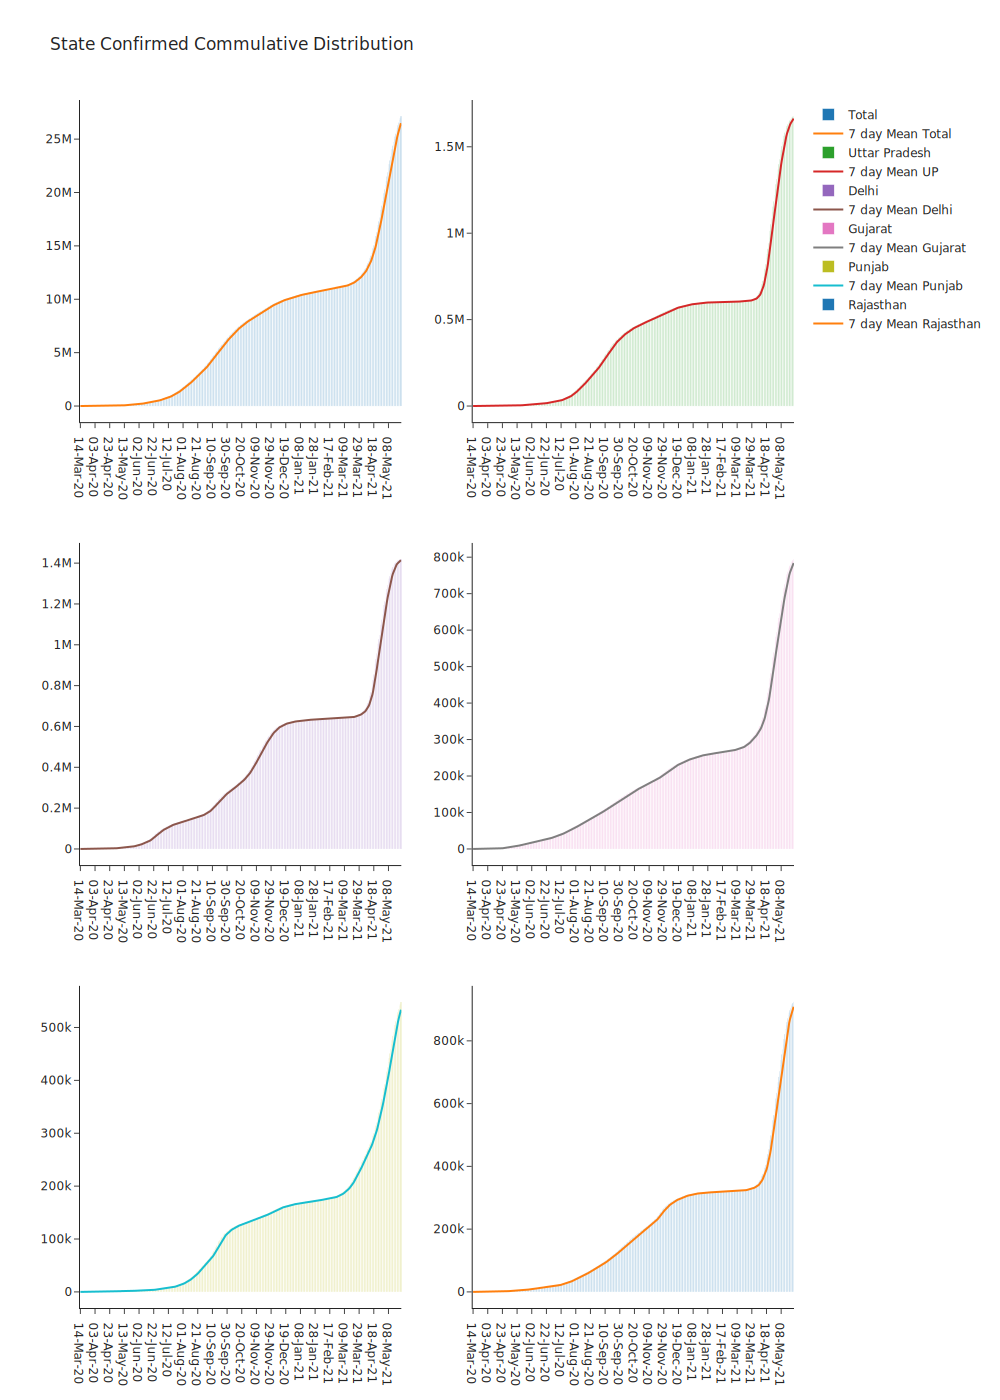

In [25]:
fig1 = make_subplots(rows=3, cols=2, shared_xaxes=False)
fig1.add_trace(go.Bar(x=temp['Date'], y=temp['TTtotal'],name='Total'),1,1)
fig1.add_trace(go.Scatter(x=temp['Date'], y=temp['7dyMnTT'], name="7 day Mean Total"), row=1, col=1)
fig1.add_trace(go.Bar(x=temp['Date'], y=temp['UPtotal'],name='Uttar Pradesh'),1,2)
fig1.add_trace(go.Scatter(x=temp['Date'], y=temp['7dyMnUP'], name="7 day Mean UP"), row=1, col=2)
fig1.add_trace(go.Bar(x=temp['Date'], y=temp['DLtotal'],name='Delhi'),2,1)
fig1.add_trace(go.Scatter(x=temp['Date'], y=temp['7dyMnDL'], name="7 day Mean Delhi"), row=2, col=1)
fig1.add_trace(go.Bar(x=temp['Date'], y=temp['GJtotal'],name='Gujarat'),2,2)
fig1.add_trace(go.Scatter(x=temp['Date'], y=temp['7dyMnGJ'], name="7 day Mean Gujarat"), row=2, col=2)
fig1.add_trace(go.Bar(x=temp['Date'], y=temp['PBtotal'],name='Punjab'),3,1)
fig1.add_trace(go.Scatter(x=temp['Date'], y=temp['7dyMnPB'], name="7 day Mean Punjab"), row=3, col=1)
fig1.add_trace(go.Bar(x=temp['Date'], y=temp['RJtotal'],name='Rajasthan'),3,2)
fig1.add_trace(go.Scatter(x=temp['Date'], y=temp['7dyMnRJ'], name="7 day Mean Rajasthan"), row=3, col=2)
fig1.update_layout(template='simple_white',height = 1500,
                   title='State Confirmed Commulative Distribution')#showlegend=False,
fig1.show('svg',height = 1400, width = 1000) #static image

## Reading, exploring and cleaning more COVID-19 datasets available

In [26]:
# read data from the dataset into dataframes
age_group_details = pd.read_csv('C:\\Users\\shlok\\Documents\\AgeGroupDetails.csv')
covid_19_india = pd.read_csv('C:\\Users\\shlok\\Documents\\covid_19_india.csv')
hospital_beds_india = pd.read_csv('C:\\Users\\shlok\\Documents\\HospitalBedsIndia.csv')
icmr_testing_details = pd.read_csv('C:\\Users\\shlok\\Documents\\ICMRTestingDetails.csv')
individual_details = pd.read_csv('C:\\Users\\shlok\\Documents\\IndividualDetails.csv')
population_india_census_2011 = pd.read_csv('C:\\Users\\shlok\\Documents\\population_india_census2011.csv')
statewise_testing_details = pd.read_csv('C:\\Users\\shlok\\Documents\\StatewiseTestingDetails.csv')

# explore each of the dataframes (below)

In [27]:
age_group_details.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [28]:
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [29]:
hospital_beds_india.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [30]:
icmr_testing_details.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.0,5900.0,78.0
1,2,18/03/20 18:00,13125.0,12235.0,150.0
2,3,19/03/20 18:00,14175.0,13285.0,182.0
3,4,20/03/20 18:00,15404.0,14514.0,236.0
4,5,21/03/20 18:00,16911.0,16021.0,315.0


In [31]:
individual_details.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [32]:
population_india_census_2011.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [33]:
statewise_testing_details.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-04-02,Andhra Pradesh,1800.0,1175.0,132.0


In [34]:
# update the state name for Telangana
population_india_census_2011['State / Union Territory'] = population_india_census_2011['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

# update the district name for Ahmedabad
individual_details['detected_district'] = individual_details['detected_district'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

# udpate the city name for Ahmedabad
individual_details['detected_city'] = individual_details['detected_city'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

### 6) Total positive cases in each age group

## Plot

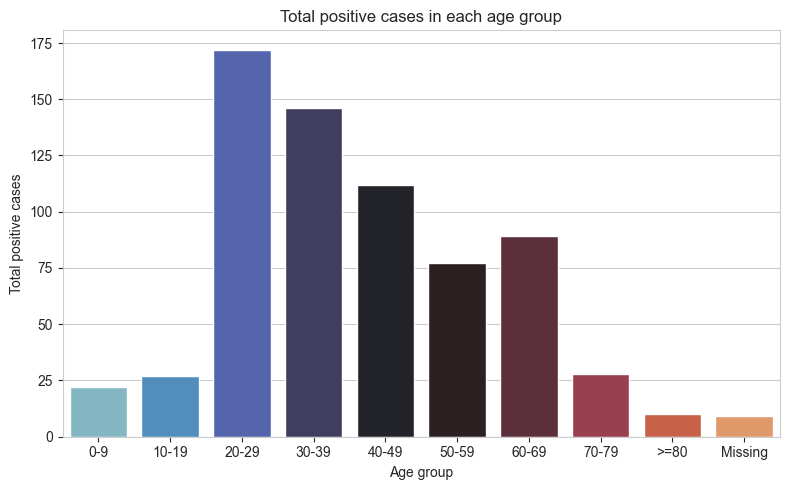

In [35]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = 'AgeGroup', y = 'TotalCases', data = age_group_details, palette = 'icefire')
plt.title('Total positive cases in each age group')
plt.xlabel('Age group')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

### 7)Total cases in India and each of its states and union territories

#### 7.1)Creating a dataframe with important data from each state/union territory as well as India

In [36]:
temp_state = covid_19_india.groupby('State/UnionTerritory').max()
temp_state.reset_index(inplace = True)
temp_state['Active'] = temp_state['Confirmed'] - (temp_state['Cured'] + temp_state['Deaths'])
temp_state = temp_state[['State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths', 'Active']]
temp_state.rename(columns = {'State/UnionTerritory': 'State / Union Territory'}, inplace = True)
temp_state['State / Union Territory'] = temp_state['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

# calculate the number of cases (categorised by current health status) for India and add them to the dataframe
# index number 41 is chosen to avoid any loss of data (as of now, the total number of states and UTs in India is 28 + 8 = 36)
temp_state.loc[41] = ['India', temp_state['Confirmed'].sum(), temp_state['Cured'].sum(), temp_state['Deaths'].sum(), temp_state['Active'].sum()]
 
temp_state.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active
0,Andaman and Nicobar Islands,33,33,0,0
1,Andhra Pradesh,2090,1056,46,988
2,Arunachal Pradesh,1,1,0,0
3,Assam,65,39,2,24
4,Bihar,831,383,6,442


In [37]:
# calculate India's total area
total_area_india_km2 = population_india_census_2011['Area'].apply(lambda area : float(area.split('\xa0')[0].replace(',', ''))).sum()

temp_population = population_india_census_2011[['State / Union Territory', 'Population', 'Density']]
temp_population['Population density (per km2)'] = temp_population['Density'].apply(lambda density : float(density.split('/')[0].replace(',', '')))
temp_population.drop(columns = ['Density'], inplace = True)

# calculate India's total population
total_population_india = temp_population['Population'].sum()

# calculate India's total population density
density_india = total_population_india / total_area_india_km2

temp_population.loc[41] = ['India', total_population_india, density_india]
temp_population.head()

,State / Union Territory,Population,Population density (per km2)
0,Uttar Pradesh,199812341,828.0
1,Maharashtra,112374333,365.0
2,Bihar,104099452,1102.0
3,West Bengal,91276115,1029.0
4,Madhya Pradesh,72626809,236.0


In [38]:
statewise_data = pd.merge(left = temp_state, right = temp_population, on = 'State / Union Territory', how = 'inner')

# select India's data from the merged dataframe and storing it as a series in a variable
india_data = statewise_data.iloc[-1]

# drop India's data stored in the last row of the dataframe
statewise_data.drop(statewise_data.tail(1).index, inplace = True)

# store India's data in a row with index number 41 in the dataframe
statewise_data.loc[41] = india_data

# dataframe with important data from each state/union territory as well as India
statewise_data.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active,Population,Population density (per km2)
0,Andaman and Nicobar Islands,33,33,0,0,380581,46.0
1,Andhra Pradesh,2090,1056,46,988,49577103,303.0
2,Arunachal Pradesh,1,1,0,0,1383727,17.0
3,Assam,65,39,2,24,31205576,397.0
4,Bihar,831,383,6,442,104099452,1102.0


#### 7.2 Plot

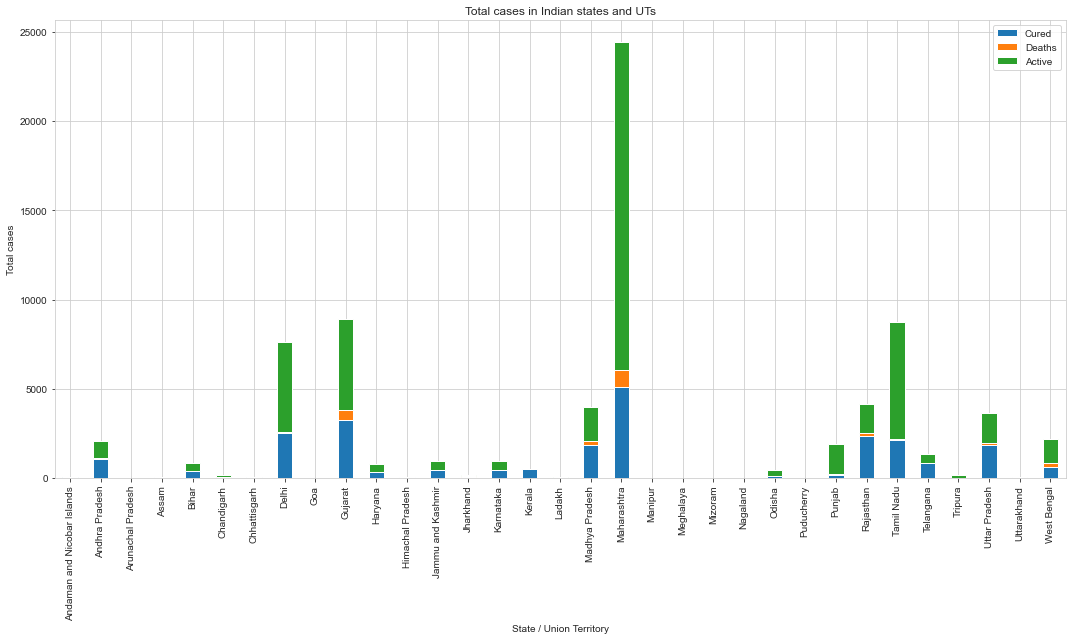

In [39]:
statewise_data.drop(41)[['State / Union Territory', 'Cured', 'Deaths', 'Active']].plot.bar(x = 'State / Union Territory', stacked = True, figsize = (15, 9))
plt.title('Total cases in Indian states and UTs')
plt.ylabel('Total cases')
plt.tight_layout()
plt.show()

#### 7.3 Number of cases in India

In [40]:
total_cases_national = statewise_data.loc[41]['Confirmed']
active_national = statewise_data.loc[41]['Active']
cured_national = statewise_data.loc[41]['Cured']
deaths_national = statewise_data.loc[41]['Deaths']
print('NUMBER OF CASES IN INDIA\n')
print(f'Total: {total_cases_national}')
print(f'Active: {active_national}')
print(f'Cured: {cured_national}')
print(f'Deaths: {deaths_national}')

NUMBER OF CASES IN INDIA

Total: 74404
Active: 47600
Cured: 24386
Deaths: 2418


### 8)  Important COVID-19 statistics of India and each of its states and union territories

#### 8.1 Calculation from available data

In [41]:
# calculate total cases per million people for each state/union territory and India
statewise_data['Total cases per million people'] = statewise_data['Confirmed'] / statewise_data['Population'] * pow(10, 6)

# calculate recovery rate (%) for each state/union territory and India
statewise_data['Recovery rate (%)'] = statewise_data['Cured'] / statewise_data['Confirmed'] * 100

# calculate deaths per million people for each state/union territory and India
statewise_data['Deaths per million people'] = statewise_data['Deaths'] / statewise_data['Population'] * pow(10, 6)

# calculate fatality rate (%) for each state/union territory and India
statewise_data['Fatality rate (%)'] = statewise_data['Deaths'] / statewise_data['Confirmed'] * 100

statewise_data.head()

,State / Union Territory,Confirmed,Cured,Deaths,Active,Population,Population density (per km2),Total cases per million people,Recovery rate (%),Deaths per million people,Fatality rate (%)
0,Andaman and Nicobar Islands,33,33,0,0,380581,46.0,86.709531,100.000000,0.000000,0.000000
1,Andhra Pradesh,2090,1056,46,988,49577103,303.0,42.156558,50.526316,0.927848,2.200957
2,Arunachal Pradesh,1,1,0,0,1383727,17.0,0.722686,100.000000,0.000000,0.000000
3,Assam,65,39,2,24,31205576,397.0,2.082961,60.000000,0.064091,3.076923
4,Bihar,831,383,6,442,104099452,1102.0,7.982751,46.089049,0.057637,0.722022


#### 8.2 Total cases per million people (plot)

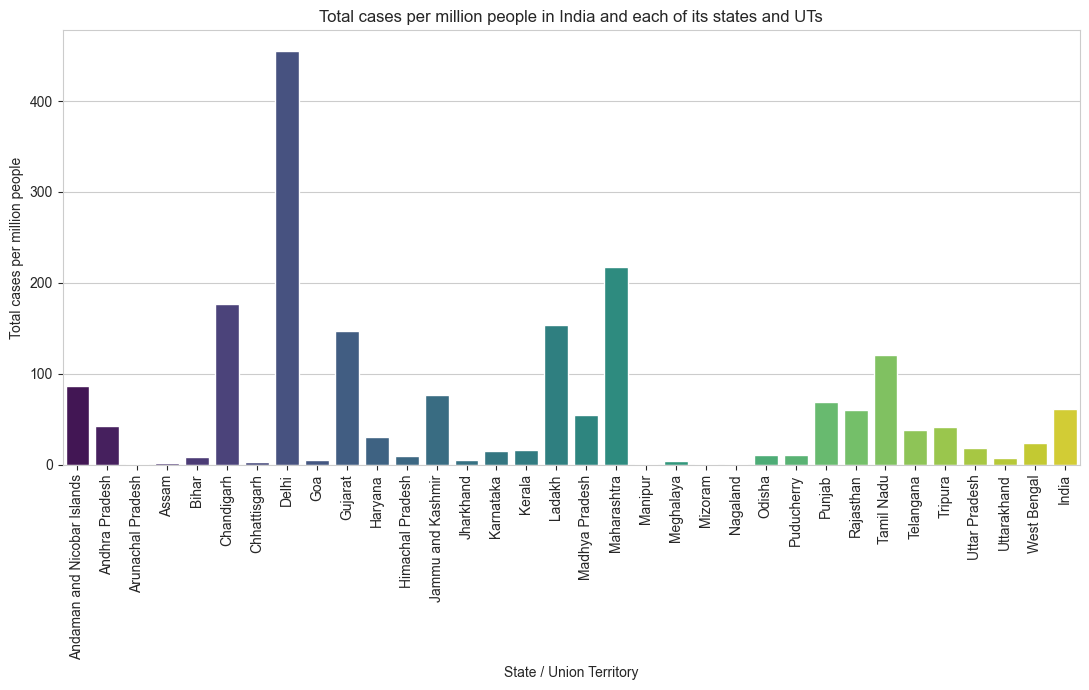

In [42]:
plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Total cases per million people', data = statewise_data, palette = 'viridis')
plt.title('Total cases per million people in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 8.3 plotting Recovery rate (%) 

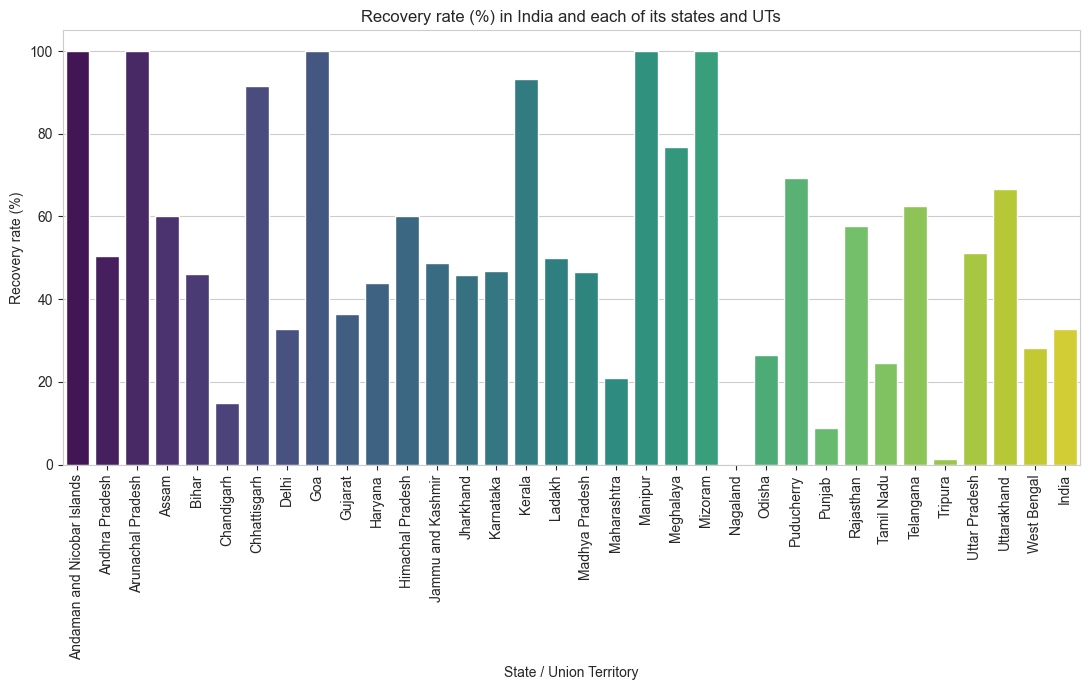

In [43]:
plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Recovery rate (%)', data = statewise_data, palette = 'viridis')
plt.title('Recovery rate (%) in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 8.4 Plotting Deaths per million people

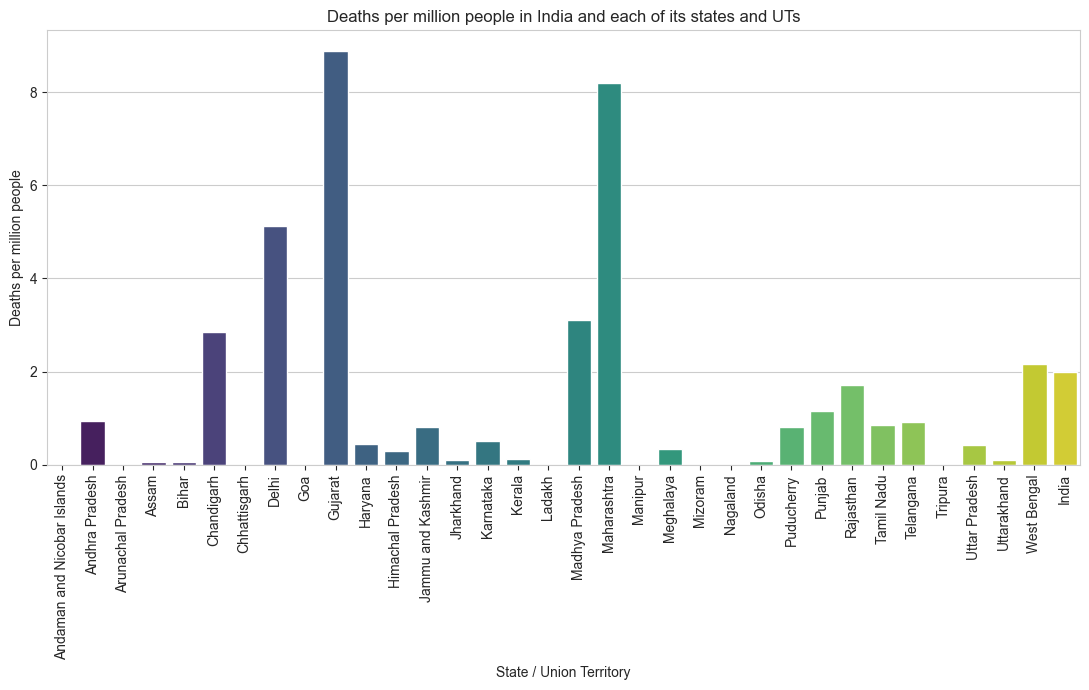

In [44]:
plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Deaths per million people', data = statewise_data, palette = 'viridis')
plt.title('Deaths per million people in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 8.5 Plotting Fatality rate (%) 

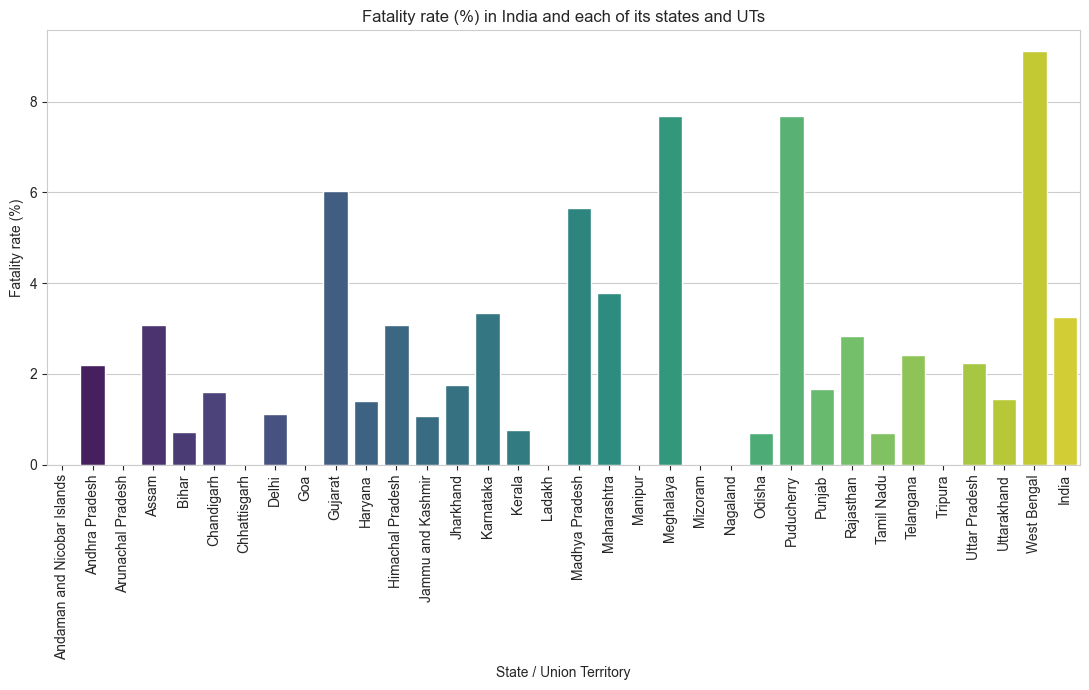

In [45]:
plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Fatality rate (%)', data = statewise_data, palette = 'viridis')
plt.title('Fatality rate (%) in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### 9) Age distribution of positive cases in India and each of its states and union territories

#### 9.1 Data cleaning

In [46]:
# create a list of the Indian states where positive COVID-19 cases have been reported
list_of_states = list(individual_details['detected_state'].unique())

# create a list of nationalities of all the positive COVID-19 cases reported in India
list_of_nations = list(individual_details[individual_details['nationality'].isnull() == False]['nationality'].unique())

temp_age = individual_details[['age', 'detected_state', 'nationality', 'current_status']]
for i in temp_age.index:
    if temp_age.loc[i]['detected_state'] in list_of_states and temp_age.loc[i]['nationality'] not in list_of_nations:
        # assign nationality as 'India', if detected state is in the list of Indian states but nationality is not in the list of reported nationalities
        temp_age.loc[i]['nationality'] = 'India'
        
# select only those cases whose nationality is mentioned as 'India'
temp_age = temp_age[temp_age['nationality'] == 'India']

# drop the rows where age is mentioned as 'F' or 'M'
temp_age = temp_age[(temp_age['age'] != 'F') & (temp_age['age'] != 'M')]

# drop the rows where age is not mentioned
temp_age.dropna(subset = ['age'], inplace = True)

# if age is mentioned as '28-35', update it with the mean value, i.e. 31 (the actual mean value is 31.5, but since we want to assign a value for age, we use 31)
# typecast age given as a string into a floating point number first, and then into an integer - for instances where age is mentioned as a floating-point string
temp_age['age'] = temp_age['age'].apply(lambda age : 31 if age == '28-35' else int(float(age)))

temp_age.head()

,age,detected_state,nationality,current_status
0,20,Kerala,India,Recovered
3,45,Delhi,India,Recovered
4,24,Telangana,India,Recovered
23,45,Uttar Pradesh,India,Recovered
25,16,Uttar Pradesh,India,Recovered


#### 9.2 Plot (States and union territories)

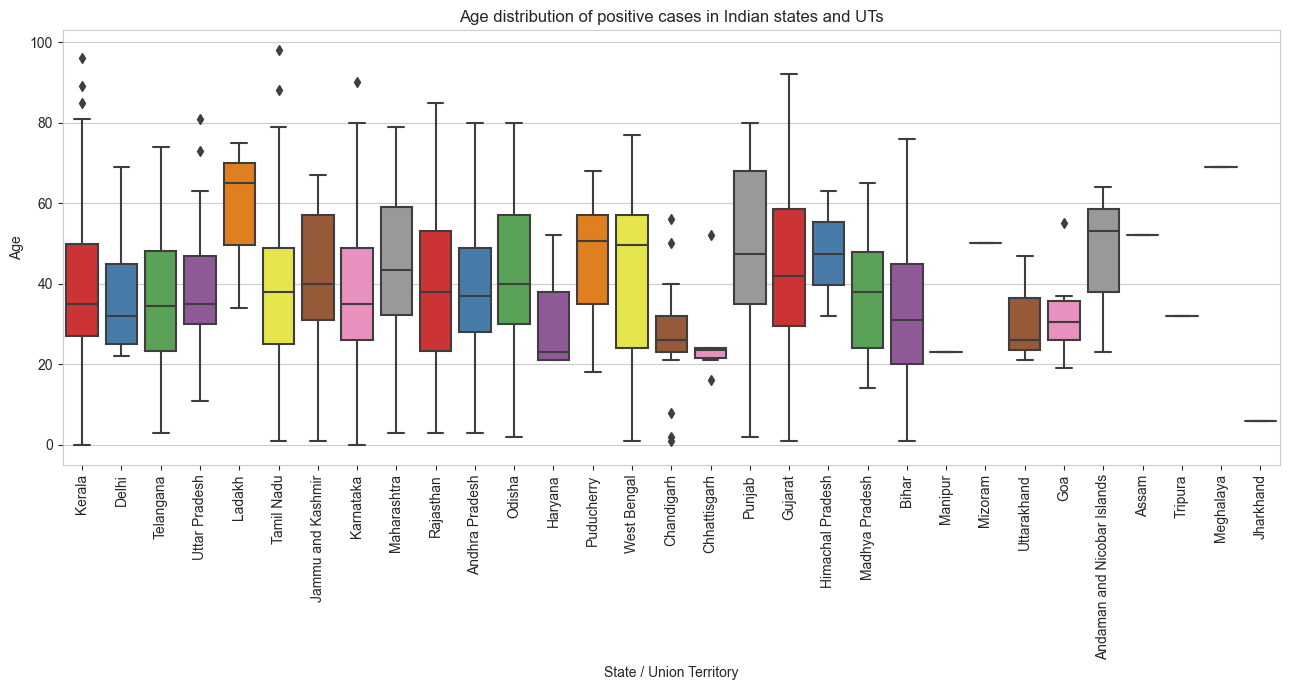

In [47]:
plt.figure(figsize=(13, 7), dpi = 100)
sns.boxplot(x = 'detected_state', y = 'age', data = temp_age, palette = 'Set1')
plt.title('Age distribution of positive cases in Indian states and UTs')
plt.xlabel('State / Union Territory')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 9.3 Plotting w.r.t India

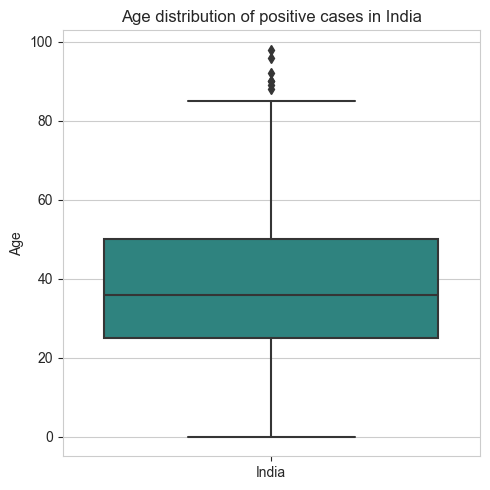

In [48]:
plt.figure(figsize=(5, 5), dpi = 100)
sns.boxplot(x = 'nationality', y = 'age', data = temp_age, palette = 'viridis')
plt.title('Age distribution of positive cases in India')
plt.xlabel('')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### 10) National descriptive statistics in parameter of Age

#### 10.1 Ages of all positive cases in India

In [49]:
print('NATIONAL DESCRIPTIVE STATISTICS (Ages of all positive cases in India)\n')
print(temp_age.describe()['age'])

NATIONAL DESCRIPTIVE STATISTICS (Ages of all positive cases in India)

count    2318.000000
mean       38.282571
std        17.224105
min         0.000000
25%        25.000000
50%        36.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64


#### 10.2 Ages of positive cases in India (grouped by current health status)

In [50]:
print('NATIONAL DESCRIPTIVE STATISTICS (Ages of positive cases in India, grouped by current health status)\n')
print(temp_age.groupby('current_status').describe()['age'])

NATIONAL DESCRIPTIVE STATISTICS (Ages of positive cases in India, grouped by current health status)

                 count       mean        std  min   25%   50%    75%   max
current_status                                                            
Deceased          43.0  59.860465  16.359912  1.0  50.0  65.0  70.00  85.0
Hospitalized    2165.0  37.835104  16.907300  0.0  25.0  36.0  50.00  98.0
Recovered        110.0  38.654545  18.443783  1.0  24.0  35.0  50.25  96.0


### 11)Correlation between population (or, population density) and total positive cases

#### 11.1 Heat map

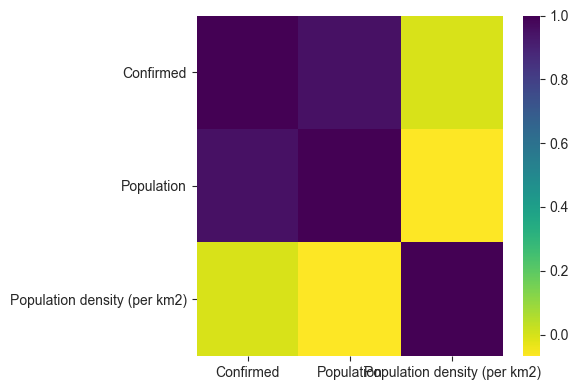

In [51]:
plt.figure(figsize=(6, 4), dpi = 100)
sns.heatmap(statewise_data[['Confirmed', 'Population', 'Population density (per km2)']].corr(), cmap = 'viridis_r')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

#### 11.2 Simple linear regression (independent variable: Population, dependent variable: Total positive cases)

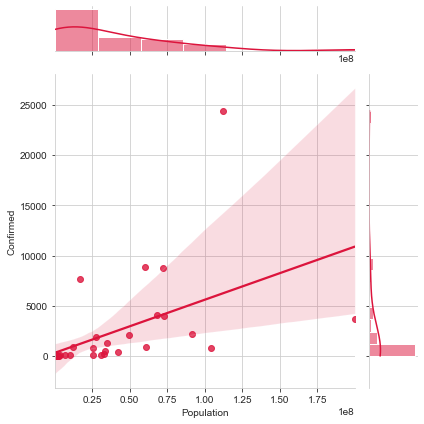

In [52]:
sns.jointplot(x = 'Population', y = 'Confirmed', data = statewise_data.drop(41), kind = 'reg', color = 'crimson')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

#### 11.3 Simple linear regression (independent variable: Density per km<sup>2</sup>, dependent variable: Total positive cases)

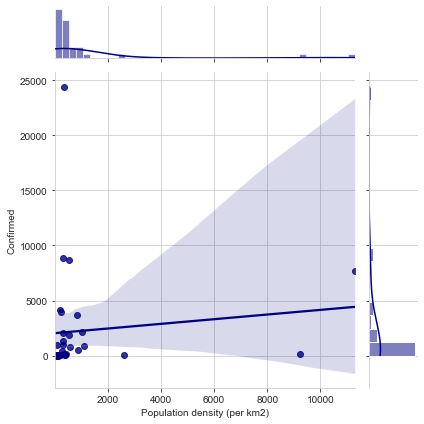

In [53]:
sns.jointplot(x = 'Population density (per km2)', y = 'Confirmed', data = statewise_data.drop(41), kind = 'reg', color = 'navy')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()

### 12) Analysis & Visual Design of Public health facilities in India and each of its states and union territories

#### 12.1 Creating a dataframe with public health facility details for each state/UT and India

In [54]:
hospital_details = hospital_beds_india[['State/UT', 'TotalPublicHealthFacilities_HMIS', 'NumPublicBeds_HMIS']]
hospital_details.rename(columns = {'State/UT': 'State / Union Territory'}, inplace = True)
hospital_details['State / Union Territory'] = hospital_details['State / Union Territory'].apply(lambda name : str(name).replace('&', 'and'))
hospital_details.dropna(inplace = True)
hospital_details['TotalPublicHealthFacilities_HMIS'] = hospital_details['TotalPublicHealthFacilities_HMIS'].apply(lambda count : int(str(count).replace(',', '')))
hospital_details['NumPublicBeds_HMIS'] = hospital_details['NumPublicBeds_HMIS'].apply(lambda count : int(str(count).replace(',', '')))

# merge (or, add) the details for Dadra and Nagar Haveli & Daman and Diu (as the former UTs have been merged into a single UT) and update the dataframe
dnhdd = hospital_details[(hospital_details['State / Union Territory'] == 'Dadra and Nagar Haveli') | (hospital_details['State / Union Territory'] == 'Daman and Diu')].sum()
hospital_details.drop(index = [7, 8, 36], inplace = True)
hospital_details.loc[36] = ['Dadra and Nagar Haveli and Daman and Diu', dnhdd['TotalPublicHealthFacilities_HMIS'], dnhdd['NumPublicBeds_HMIS']]

hospital_details.sort_values('State / Union Territory', inplace = True)
hospital_details.loc[37] = ['India', hospital_details['TotalPublicHealthFacilities_HMIS'].sum(), hospital_details['NumPublicBeds_HMIS'].sum()]
hospital_details = pd.merge(left = hospital_details, right = temp_population.drop(columns = ['Population density (per km2)']), on = 'State / Union Territory', how = 'inner')

# calculate public health facility details per 1000 people for each state/UT as well as India
hospital_details['TotalPublicHealthFacilities/1000 people'] = (hospital_details['TotalPublicHealthFacilities_HMIS'] / hospital_details['Population']) * 1000
hospital_details['NumPublicBeds/1000 people'] = (hospital_details['NumPublicBeds_HMIS'] / hospital_details['Population']) * 1000

# dataframe with public health facility details for each state/UT and India
hospital_details.head()

,State / Union Territory,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,Population,TotalPublicHealthFacilities/1000 people,NumPublicBeds/1000 people
0,Andaman and Nicobar Islands,34,1246,380581,0.089337,3.273942
1,Andhra Pradesh,1666,60799,49577103,0.033604,1.226352
2,Arunachal Pradesh,199,2320,1383727,0.143814,1.676631
3,Assam,1220,19115,31205576,0.039096,0.612551
4,Bihar,2146,17796,104099452,0.020615,0.170952


#### 12.2 Plotting Population of each state/UT

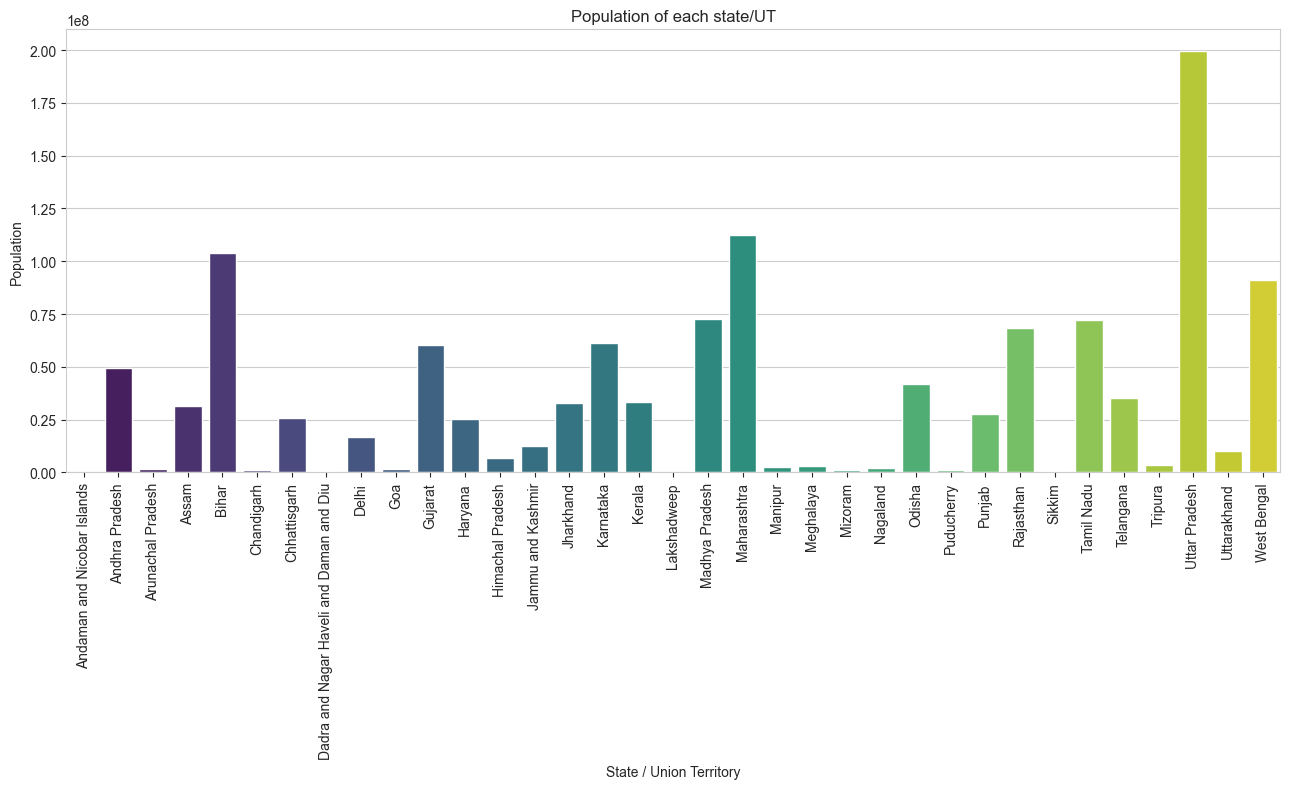

In [55]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Population', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Population of each state/UT')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 12.3 Plotting Total public health facilities in each state/UT

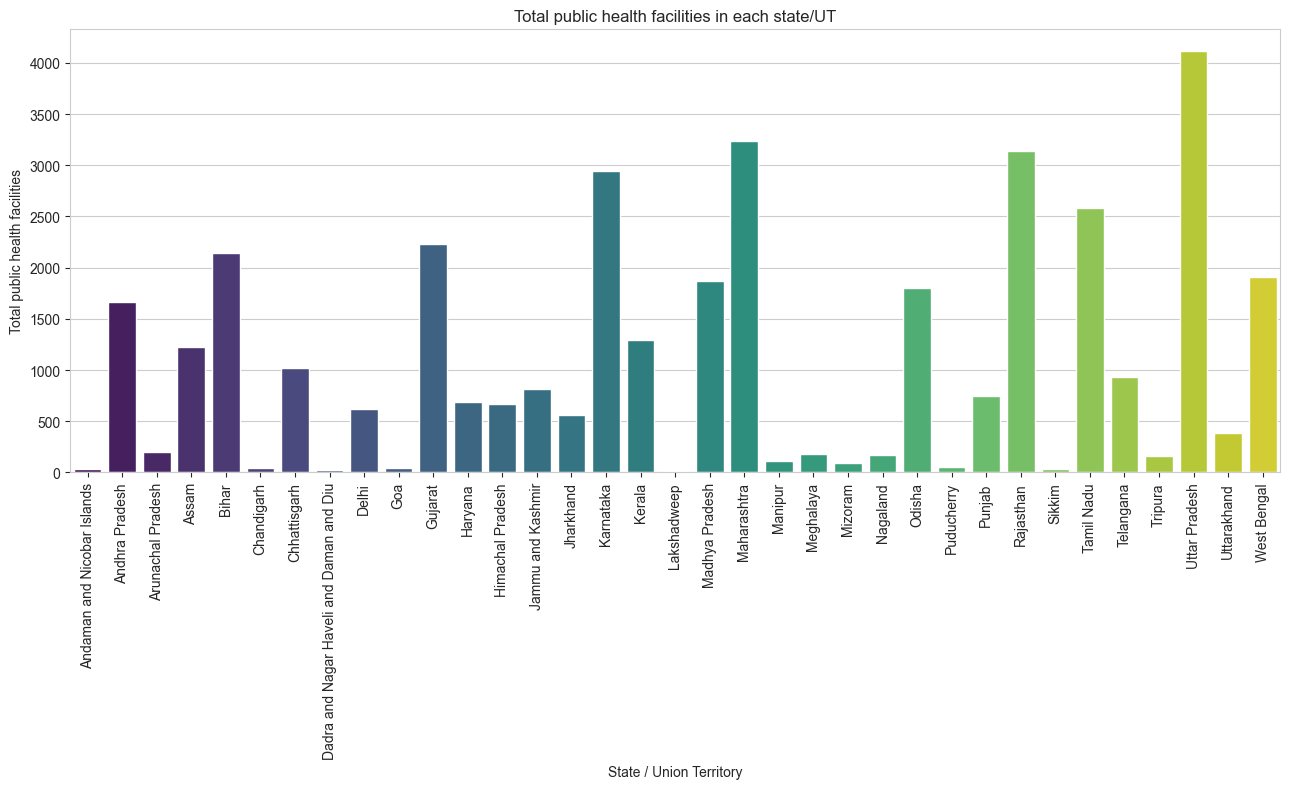

In [56]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'TotalPublicHealthFacilities_HMIS', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Total public health facilities in each state/UT')
plt.ylabel('Total public health facilities')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 12.4 Plotting Number of public beds in each state/UT

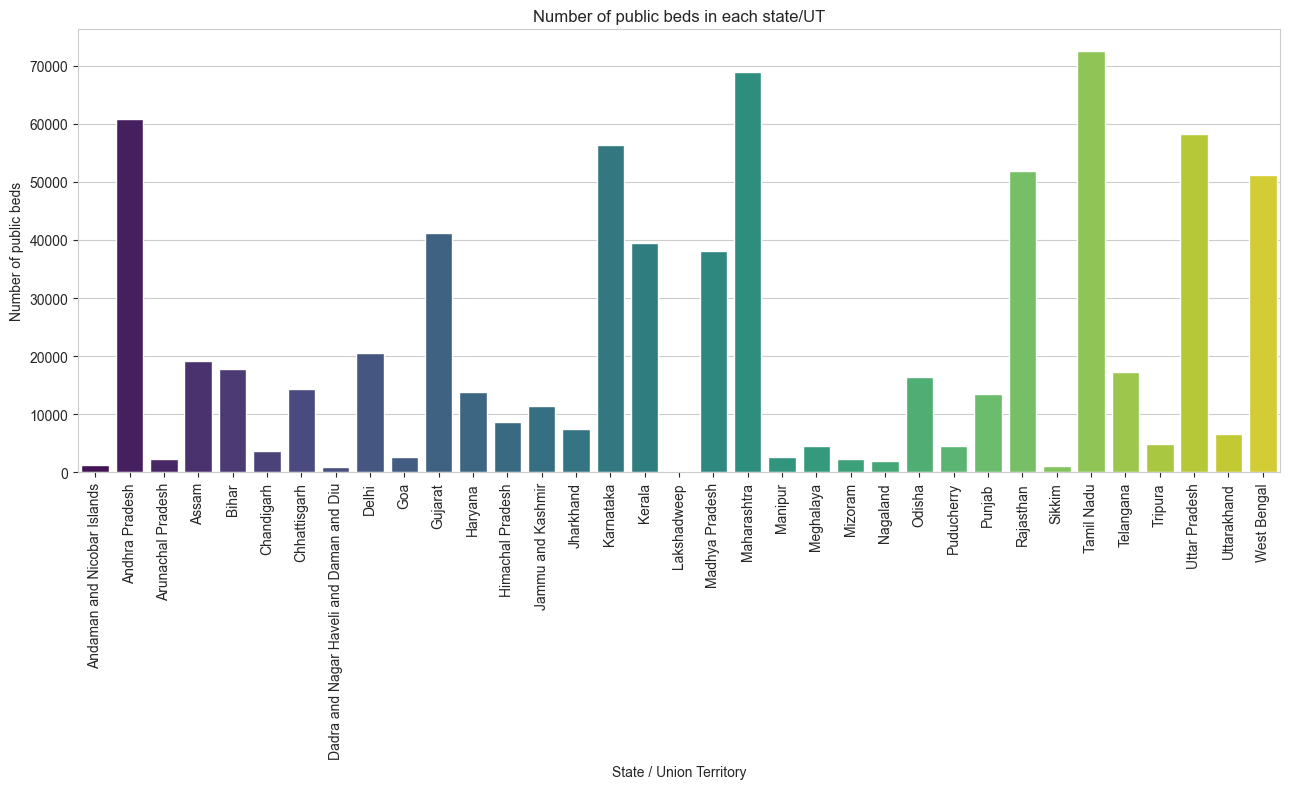

In [57]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'NumPublicBeds_HMIS', data = hospital_details.drop(35), palette = 'viridis')
plt.title('Number of public beds in each state/UT')
plt.ylabel('Number of public beds')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 12.5 Plotting Total public health facilities per 1000 people in each state/UT and India

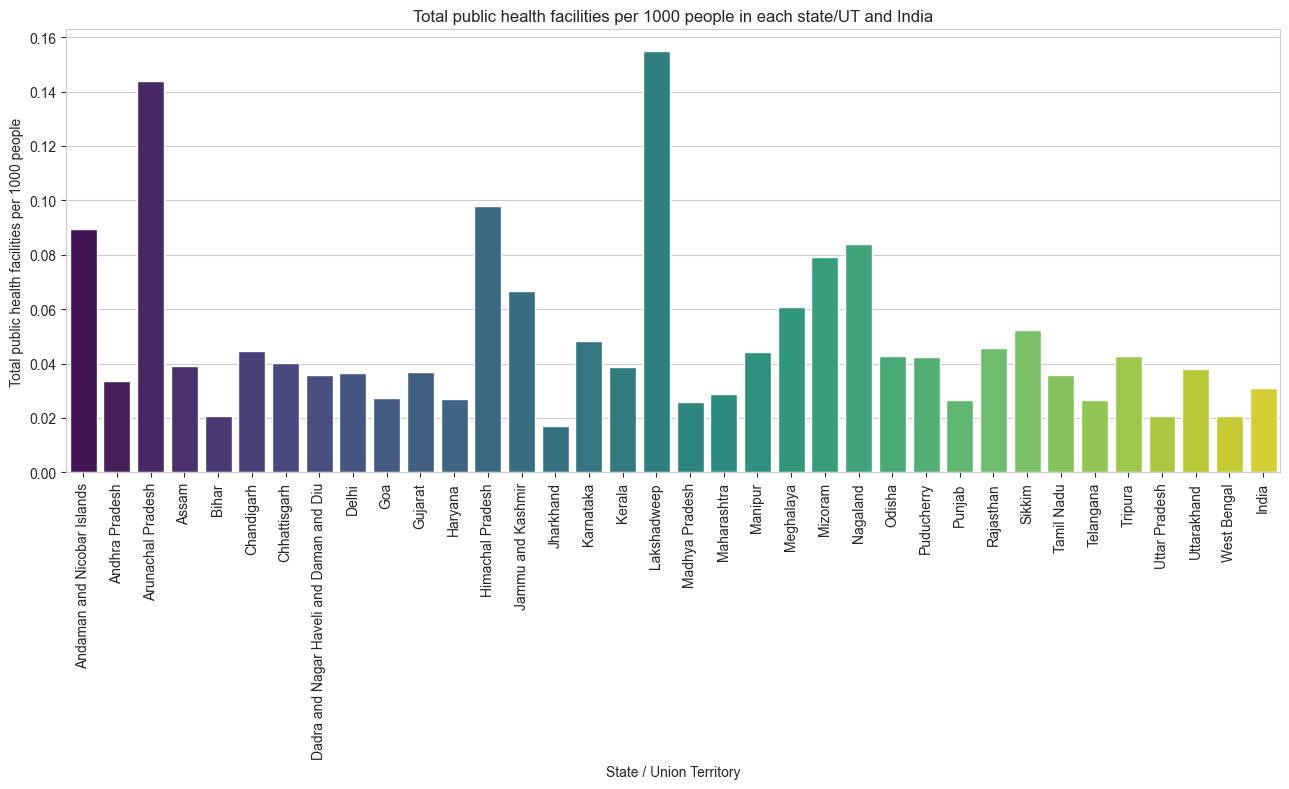

In [58]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'TotalPublicHealthFacilities/1000 people', data = hospital_details, palette = 'viridis')
plt.title('Total public health facilities per 1000 people in each state/UT and India')
plt.ylabel('Total public health facilities per 1000 people')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 12.6 Plotting Number of public beds per 1000 people in each state/UT and India

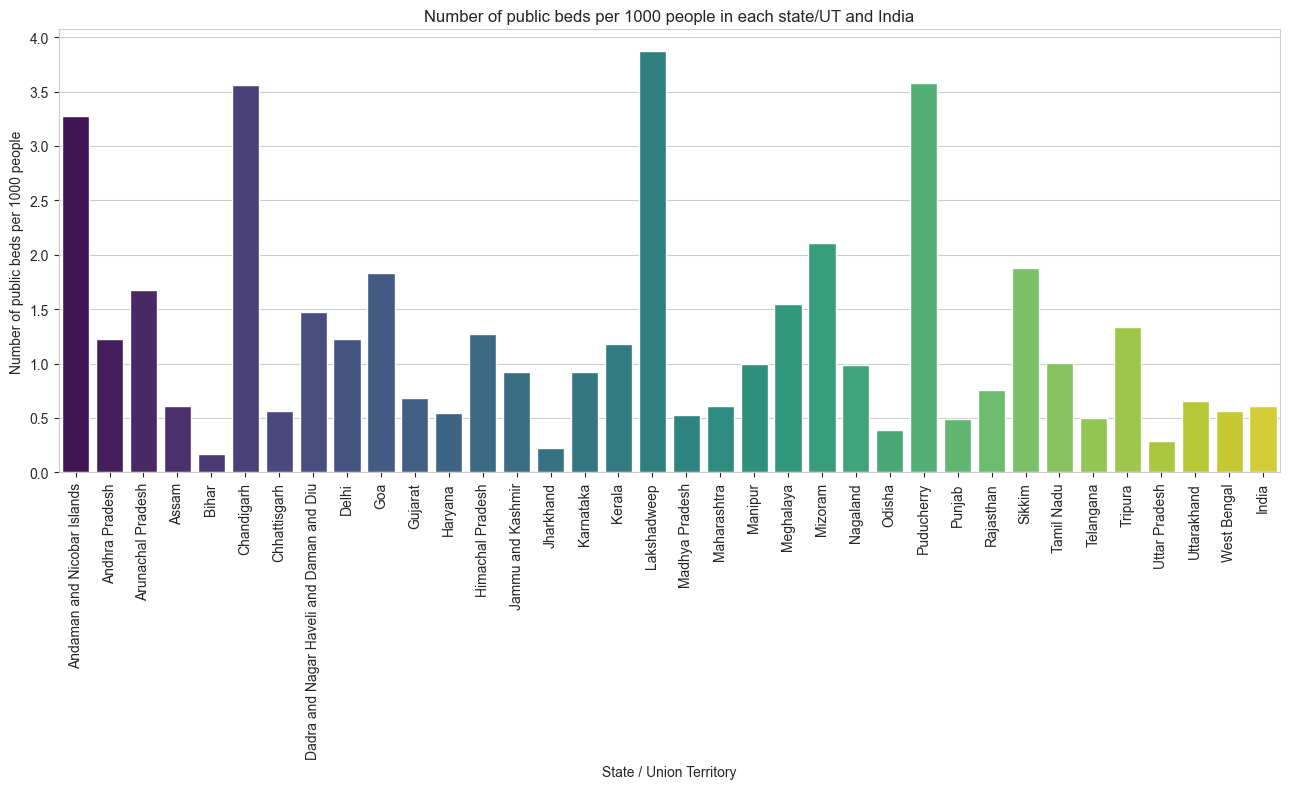

In [59]:
plt.figure(figsize=(13, 8), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'NumPublicBeds/1000 people', data = hospital_details, palette = 'viridis')
plt.title('Number of public beds per 1000 people in each state/UT and India')
plt.ylabel('Number of public beds per 1000 people')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 12.7 Plotting Correlation heat map

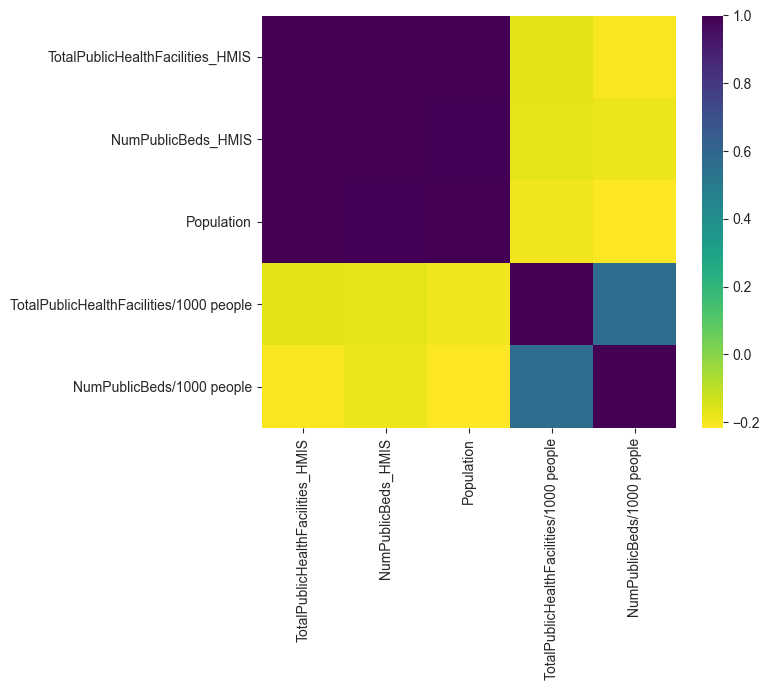

In [60]:
plt.figure(figsize=(8, 7), dpi = 100)
sns.heatmap(hospital_details.corr(), cmap = 'viridis_r')
plt.tight_layout()
plt.show()

### 13) Indian Council of Medical Research (ICMR) testing details analysis and visual design

#### 13.1 Data cleaning

In [61]:
testing_details = icmr_testing_details[['TotalSamplesTested', 'TotalPositiveCases']]

# change the date format to 'YYYY-MM-DD'
testing_details['Date'] = icmr_testing_details['DateTime'].apply(lambda dt : '20' + '-'.join(dt.split(' ')[0].split('/')[::-1]))

testing_details = testing_details[['Date', 'TotalSamplesTested', 'TotalPositiveCases']]

# dataframe with date-wise testing details provided by the Indian Council of Medical Research (ICMR)
testing_details.head() 

,Date,TotalSamplesTested,TotalPositiveCases
0,2020-03-13,6500.0,78.0
1,2020-03-18,13125.0,150.0
2,2020-03-19,14175.0,182.0
3,2020-03-20,15404.0,236.0
4,2020-03-21,16911.0,315.0


#### 13.2 Plotting Total samples tested and total positive cases reported on each date

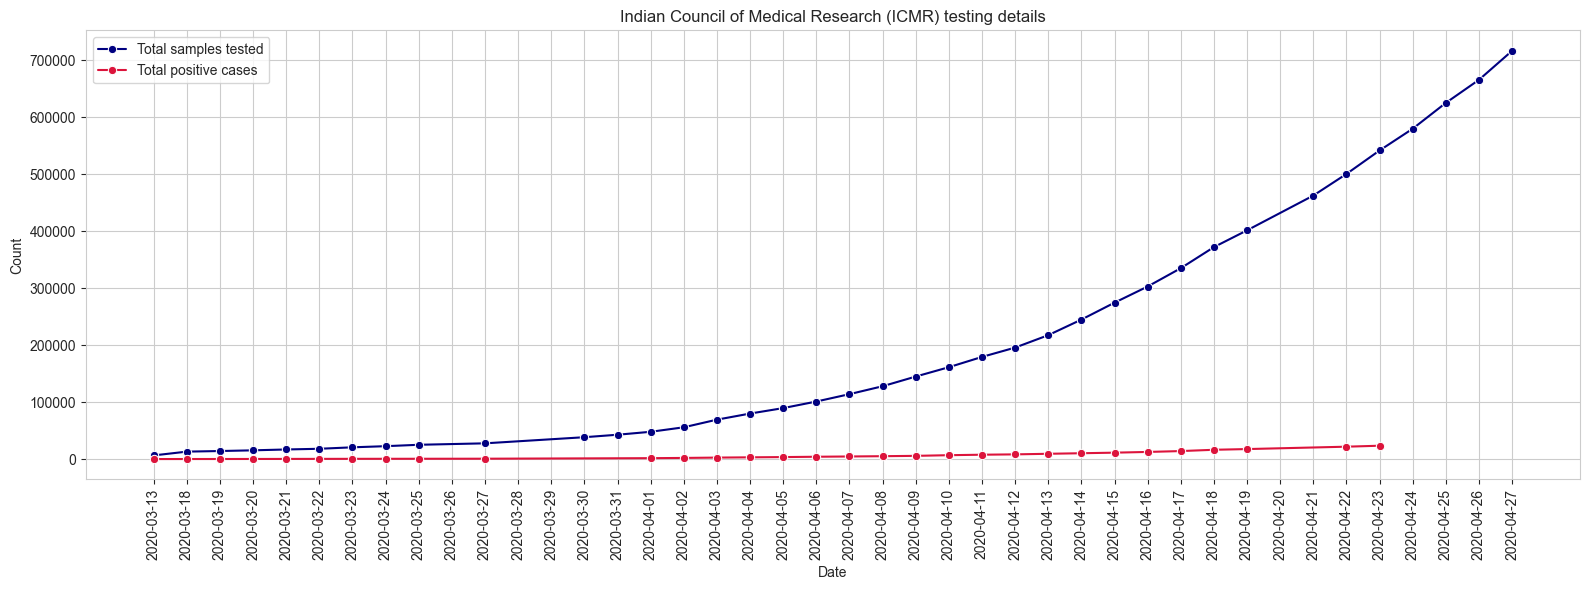

In [62]:
plt.figure(figsize=(16, 6), dpi = 100)
sns.lineplot(x = 'Date', y = 'TotalSamplesTested', data = testing_details, label = 'Total samples tested', color = 'navy', marker = 'o') 
sns.lineplot(x = 'Date', y = 'TotalPositiveCases', data = testing_details, label = 'Total positive cases', color = 'crimson', marker = 'o')
plt.title('Indian Council of Medical Research (ICMR) testing details')
plt.ylabel('Count')
plt.legend(loc = 0)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 13.3 Simple linear regression (independent variable: Total samples tested, dependent variable: Total positive cases)

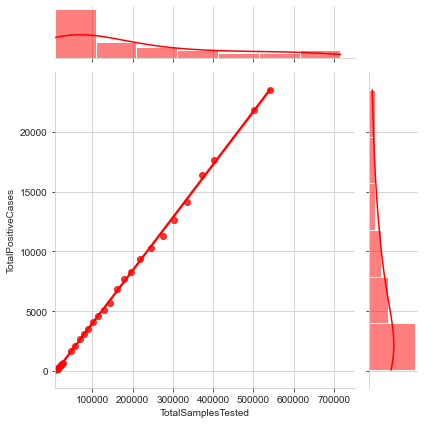

In [63]:
sns.jointplot(x = 'TotalSamplesTested', y = 'TotalPositiveCases', data = testing_details, kind = 'reg', color = 'r')
plt.xlabel('Total samples tested')
plt.ylabel('Total positive cases')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### 14) States/Union territories and districts with the highest and the lowest number of confirmed COVID-19 cases

#### 14.1 Data cleaning and creation of appropriate series

In [64]:
# series: states/UTs (highest number of confirmed COVID-19 cases)
states_highest = statewise_data.groupby('State / Union Territory').mean()['Confirmed'].sort_values(ascending = False).drop(labels = ['India']).head(10)

# series: states/UTs (lowest number of confirmed COVID-19 cases)
states_lowest = statewise_data.groupby('State / Union Territory').mean()['Confirmed'].sort_values().head(10)

# series: districts (highest number of confirmed COVID-19 cases)
districts_highest = individual_details['detected_district'].value_counts().head(10)

#### 14.2 States/UTs (highest number of confirmed COVID-19 cases)

##### 14.2.1 Plotting bar plot

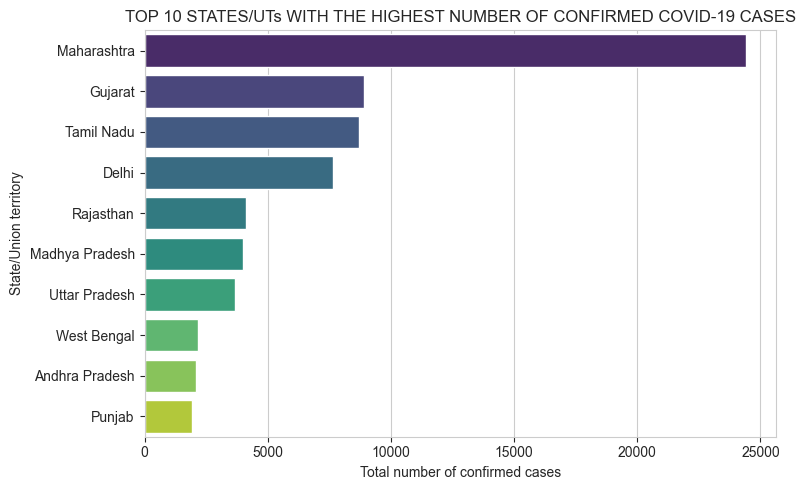

In [65]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = states_highest.values, y = states_highest.index, palette = 'viridis')
plt.title('TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('State/Union territory')
plt.tight_layout()
plt.show()

##### 14.2.2 Plotting Data table

In [66]:
print('TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(states_highest)

TOP 10 STATES/UTs WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES

State / Union Territory
Maharashtra       24427
Gujarat            8903
Tamil Nadu         8718
Delhi              7639
Rajasthan          4126
Madhya Pradesh     3986
Uttar Pradesh      3664
West Bengal        2173
Andhra Pradesh     2090
Punjab             1914
Name: Confirmed, dtype: int64


#### 14.3 States/UTs (lowest number of confirmed COVID-19 cases)

##### 14.3.1 Plot

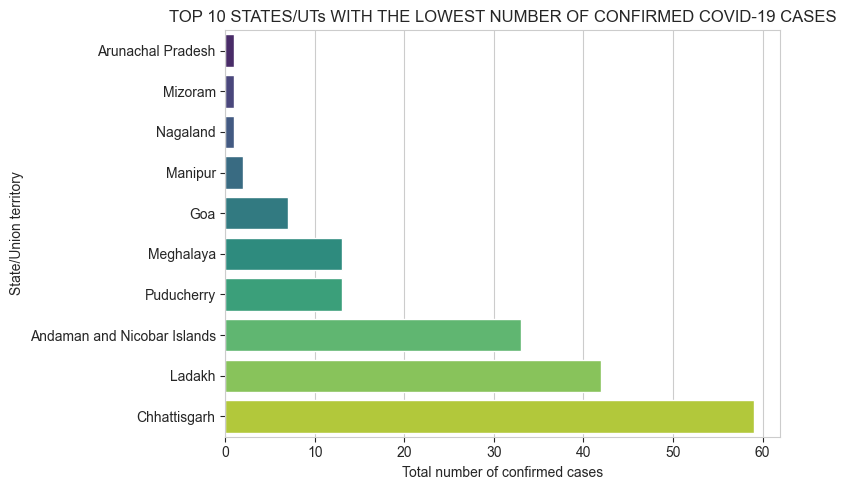

In [67]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = states_lowest.values, y = states_lowest.index, palette = 'viridis')
plt.title('TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('State/Union territory')
plt.tight_layout()
plt.show()

##### 14.3.2 Plotting Data table

In [68]:
print('TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(states_lowest)

TOP 10 STATES/UTs WITH THE LOWEST NUMBER OF CONFIRMED COVID-19 CASES

State / Union Territory
Arunachal Pradesh               1
Mizoram                         1
Nagaland                        1
Manipur                         2
Goa                             7
Meghalaya                      13
Puducherry                     13
Andaman and Nicobar Islands    33
Ladakh                         42
Chhattisgarh                   59
Name: Confirmed, dtype: int64


#### 14.4 Districts (highest number of confirmed COVID-19 cases)

##### 14.4.1 Plot

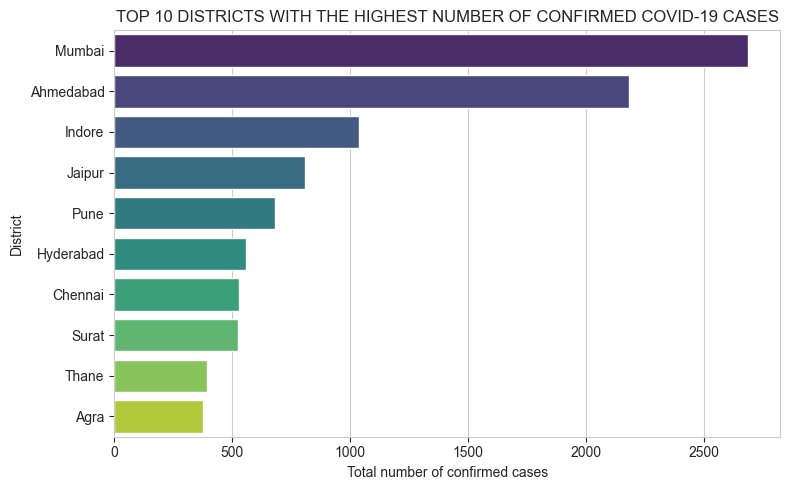

In [69]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.barplot(x = districts_highest.values, y = districts_highest.index, palette = 'viridis')
plt.title('TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES')
plt.xlabel('Total number of confirmed cases')
plt.ylabel('District')
plt.tight_layout()
plt.show()

##### 14.4.2 Plotting Data table

In [70]:
print('TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES\n')
print(districts_highest)

TOP 10 DISTRICTS WITH THE HIGHEST NUMBER OF CONFIRMED COVID-19 CASES

Mumbai       2687
Ahmedabad    2181
Indore       1036
Jaipur        808
Pune          680
Hyderabad     557
Chennai       528
Surat         526
Thane         392
Agra          374
Name: detected_district, dtype: int64


#### 14.5 Districts (lowest number of confirmed COVID-19 cases)

In [71]:
print('DISTRICTS WITH ONLY 1 CONFIRMED COVID-19 CASE\n')
for dist, cnt in zip(individual_details['detected_district'].value_counts().index, individual_details['detected_district'].value_counts().values):
    # check if there's only 1 positive case in the district and the district name doesn't contain '*', such as 'Other Region*', 'Other States*' and 'Italians*' 
    if cnt == 1 and '*' not in dist:
        print(dist)

DISTRICTS WITH ONLY 1 CONFIRMED COVID-19 CASE

Koderma
Hailakandi
Balrampur
Rajsamand
Bhadohi
Morbi
East Delhi
Beed
Dharmapuri
South Salmara Mankachar
Barabanki
Puri
Madhepura
Unnao
Gondia
Sri Muktsar Sahib
North East Delhi
Kamrup
Imphal West
Mau
Kodagu
Gomati
Kishtwar
Howrah
Jamnagar
Kalimpong
Siddipet
Kathua
Pudukkottai
Bilaspur
Mahabubabad
Pauri Garhwal
Almora
Washim
Mahe
Jehanabad
Lakhimpur
South 24 Parganas
Chittorgarh
Cuttack
Imphal East
Hooghly
Alirajpur
Giridih
Rajnandgaon
Dhenkanal
Jangoan
Sindhudurg
North and Middle Andaman
North Tripura
Aizawl
Fatehabad
Ramban
Sirmaur
Parbhani
Gonda
Ferozepur
Tapi
Surendranagar
Shahjahanpur
Durg
Dohad
Jalaun
Golaghat
Lakhisarai
Badgam
The Dangs
Nanded
Charkhi Dadri
Lohit
Ayodhya


### 15) Testing details of India and each of its states and union territories

#### 15.1 Creating a dataframe with testing details of India and each of its states and UTs

In [74]:
statewise_testing_details.rename(columns = {'State': 'State / Union Territory'}, inplace = True)
statewise_testing_details = statewise_testing_details.groupby('State / Union Territory').max()
statewise_testing_details.reset_index(inplace = True)

# add population of each state/UT to the existing dataframe to create a new merged dataframe
statewise_testing_details = pd.merge(left = statewise_testing_details[['State / Union Territory', 'TotalSamples', 'Positive']], 
                                     right = population_india_census_2011[['State / Union Territory', 'Population']], on = 'State / Union Territory', how = 'inner')

# calculate and add India's testing details to the dataframe
statewise_testing_details.iloc[-1] = ['India', statewise_testing_details['TotalSamples'].sum(), 
                                      statewise_testing_details['Positive'].sum(), statewise_testing_details['Population'].sum()]

# calculate total samples per million people for each state/union territory and India
statewise_testing_details['Total samples per million people'] = statewise_testing_details['TotalSamples'] / statewise_testing_details['Population'] * pow(10, 6)

# calculate positive cases per 1000 samples for each state/union territory and India
statewise_testing_details['Positive cases per 1000 samples'] = statewise_testing_details['Positive'] / statewise_testing_details['TotalSamples'] * 1000

statewise_testing_details.head()

,State / Union Territory,TotalSamples,Positive,Population,Total samples per million people,Positive cases per 1000 samples
0,Andaman and Nicobar Islands,3754.0,33.0,380581,9863.866036,8.790623
1,Andhra Pradesh,191874.0,2051.0,49577103,3870.214038,10.689307
2,Arunachal Pradesh,2257.0,2.0,1383727,1631.102089,0.886132
3,Assam,21791.0,64.0,31205576,698.304688,2.936992
4,Bihar,37430.0,796.0,104099452,359.560010,21.266364


#### 15.2 Plotting Total samples per million people 

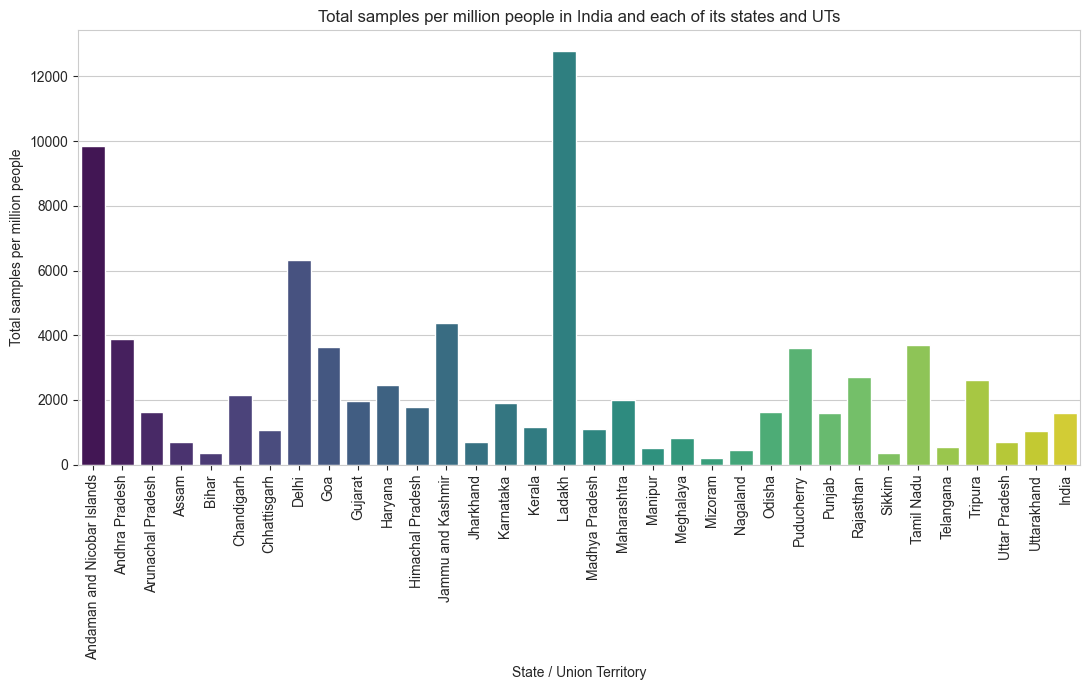

In [75]:
plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Total samples per million people', data = statewise_testing_details, palette = 'viridis')
plt.title('Total samples per million people in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### 15.3 Plotting Positive cases per 1000 samples

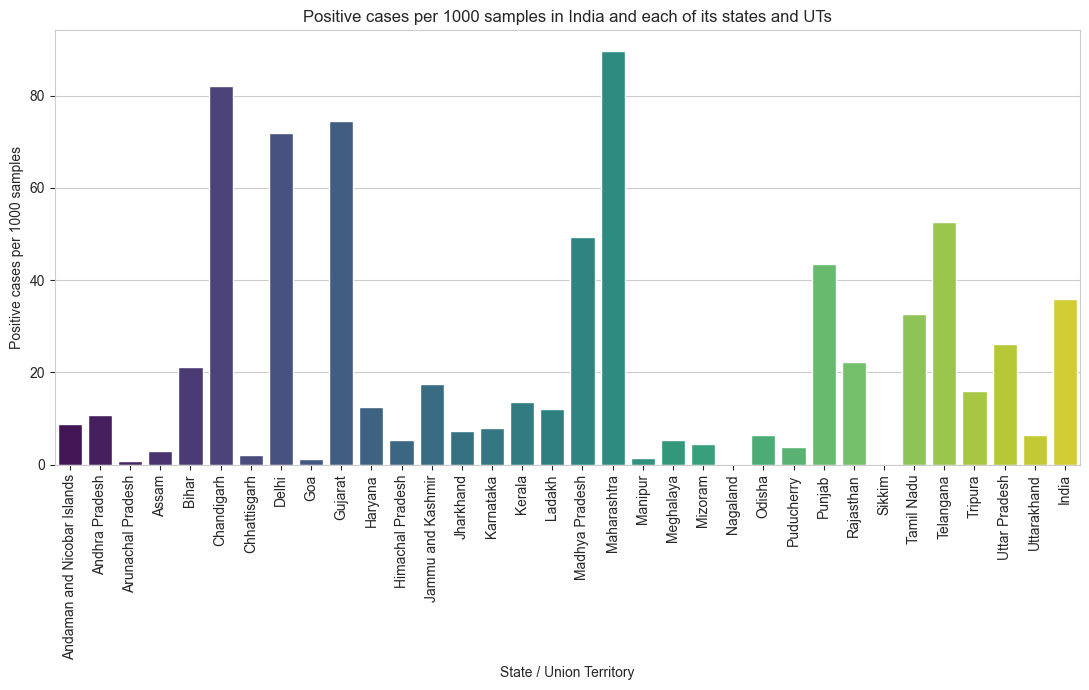

In [76]:
plt.figure(figsize=(11, 7), dpi = 100)
sns.barplot(x = 'State / Union Territory', y = 'Positive cases per 1000 samples', data = statewise_testing_details, palette = 'viridis')
plt.title('Positive cases per 1000 samples in India and each of its states and UTs')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Important COVID-19 details of India and each of its states and union territories

In [77]:
# create a dataframe with important COVID-19 details for each Indian state/UT as well as India

# sort by total number of confirmed cases in non-ascending order
covid_19_details = statewise_data.sort_values('Confirmed', ascending = False)

# add serial number (as index) to the dataframe
covid_19_details['Sno'] = range(len(covid_19_details['State / Union Territory']))
covid_19_details.set_index('Sno', inplace = True)

# rearrange the columns in the dataframe
covid_19_details = covid_19_details[['State / Union Territory', 'Confirmed', 'Cured', 'Deaths', 'Active', 'Recovery rate (%)', 'Fatality rate (%)', 
                                     'Total cases per million people', 'Deaths per million people', 'Population', 'Population density (per km2)']]

print('IMPORTANT COVID-19 DETAILS OF INDIA AND EACH OF ITS STATES AND UNION TERRITORIES')
covid_19_details

IMPORTANT COVID-19 DETAILS OF INDIA AND EACH OF ITS STATES AND UNION TERRITORIES


,State / Union Territory,Confirmed,Cured,Deaths,Active,Recovery rate (%),Fatality rate (%),Total cases per million people,Deaths per million people,Population,Population density (per km2)
Sno,,,,,,,,,,,
0,India,74404,24386,2418,47600,32.775120,3.249825,61.462052,1.997409,1210568111,368.262659
1,Maharashtra,24427,5125,921,18381,20.980882,3.770418,217.371702,8.195822,112374333,365.000000
2,Gujarat,8903,3246,537,5120,36.459620,6.031675,147.303861,8.884890,60439692,308.000000
3,Tamil Nadu,8718,2134,61,6523,24.478091,0.699702,120.836575,0.845496,72147030,555.000000
4,Delhi,7639,2512,86,5041,32.883885,1.125802,455.029000,5.122725,16787941,11297.000000
5,Rajasthan,4126,2378,117,1631,57.634513,2.835676,60.191015,1.706822,68548437,201.000000
6,Madhya Pradesh,3986,1860,225,1901,46.663322,5.644757,54.883315,3.098030,72626809,236.000000
7,Uttar Pradesh,3664,1873,82,1709,51.118996,2.237991,18.337206,0.410385,199812341,828.000000
8,West Bengal,2173,612,198,1363,28.163829,9.111827,23.806885,2.169242,91276115,1029.000000
